## Step 1 Importing necessary libraries

In [432]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data Manipulation
import numpy as np 
import pandas as pd

# Visualizations
import seaborn as sb
import matplotlib.pyplot as plt 
from scipy.stats import boxcox

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# KNN 
from sklearn.neighbors import KNeighborsClassifier

# SVM 
from sklearn.svm import SVC

# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

## Step 2 Importing datasets
Next, we have to import and store the data in a variable

In [433]:
heartData = pd.read_csv('https://raw.githubusercontent.com/tgw6201/SC1015/main/archive/heart.csv')

df = pd.DataFrame(heartData)

## Step 3 Analysing dataset

In [434]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Description of dataset

| Variable| Description|Data Type|
|---------|------------|---------|
| age  |Age of patient |Numerical|
| sex | Sex of patient:<br>1: Male<br>0: Female|Binary|
| cp    |Type of chest pain:<br>0: Typical Angina<br>1: Atypical Angina<br>2: Non-Anginal Pain<br>3: Asymptomatic|Categorical|
| trtbps    |Resting blood pressure in mmHg|Numerical|
| chol    |Cholestrol level in mg/dL|Numerical|
| fbs    |Fasting blood sugar level above 120mg/dL<br>0: False<br>1: True|Binary|
| restecg    |Resting Electrocardiographic results:<br>0: Normal<br>1: ST-T wave abnormaility<br>2: Showing probable or definite left ventricular hypertrophy|Categorical|
| thalachh    |Maximum heart rate achieved during a stress test|Numeric|
| exng    |Exercise induced angina:<br>0: No<br>1: Yes|Binary|
| oldpeak    |ST depression induced by exercise relative to rest|Numerical|
| slp    |Slope of the peak exercise ST segment:<br>0: Upsloping<br>1: Flat<br>2: Downsloping|Categorical|
| caa    |Number of major vessels (0-4) colored by fluoroscopy|Numerical|
| thall    |Thalium stress test result:<br>0: Normal<br>1: Fixed defect<br>2: Reversible defect<br>3: Not described|Categorical|
| output    |Heart disease status:<br>0: No Disease<br>1: Heart Disease|Binary|

Next, we need to rename the variable to make the names more meaningful and also changing some of the datasets from binary to categorical so that the dataset will only consist of numerical and categorical.

In [435]:
df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trtbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalachh":"MaxHeartRate",
    "exng":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slp":"STSlope",
    "caa":"nMajorVessels",
    "thall":"Thalium",
    "output":"Status"
}, inplace=True)

In [436]:
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0:False,
        1:True
    },
    "RestingECG": {
        0:"Normal",
        1:"Abnormality",
        2:"Hypertrophy"
    },
    "ExcerciseAngina": {
        0:"No",
        1:"Yes"
    },
    "STSlope": {
        0:"Upsloping",
        1:"Flat",
        2:"Downsloping"
    },
    "Thalium": {
        0:"Normal",
        1:"Fixed defect",
        2:"Reversible defect",
        3:"Not described"
    },
    "Status": {
        0:"No Disease",
        1:"Heart Disease"
    }
}

Now we can use a for loop to map the corresponding binary data into categorical ones.

In [437]:
def map_values(x, mapping):
    return mapping.get(x, x)

for feature, mapping in mappings.items():
    df[feature] = df[feature].map(lambda x: map_values(x, mapping))
    df[feature] = df[feature].astype(object)

In [438]:
df.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


This shows that tere are 6 numerical variable in the dataframe

In [439]:
df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    int64  
 1   Sex                   303 non-null    object 
 2   ChestPain             303 non-null    object 
 3   RestingBloodPressure  303 non-null    int64  
 4   Cholesterol           303 non-null    int64  
 5   FastingBloodSugar     303 non-null    object 
 6   RestingECG            303 non-null    object 
 7   MaxHeartRate          303 non-null    int64  
 8   ExcerciseAngina       303 non-null    object 
 9   OldPeak               303 non-null    float64
 10  STSlope               303 non-null    object 
 11  nMajorVessels         303 non-null    int64  
 12  Thalium               303 non-null    object 
 13  Status                303 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


This shows that there is a total of 303 data points and 14 different variable  
6 of which are numerical, 1 variable is represented by float value and the other 5 by integers  
8 of which are categorical

## Step 4 Univariate Analysis

First part is to do Exploratory Data Analysis of the given data  
We can seperate the data into two groups first, numerical and categorical for easier analysis

In [441]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

numericalData = df[numerical_columns]
categoricalData = df[categorical_columns]

In [442]:
numericalData.info()
categoricalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    int64  
 1   RestingBloodPressure  303 non-null    int64  
 2   Cholesterol           303 non-null    int64  
 3   MaxHeartRate          303 non-null    int64  
 4   OldPeak               303 non-null    float64
 5   nMajorVessels         303 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sex                303 non-null    object
 1   ChestPain          303 non-null    object
 2   FastingBloodSugar  303 non-null    object
 3   RestingECG         303 non-null    object
 4   ExcerciseAngina    303 non-null    object
 5  

After seperating the data, we want to analyse the numerical data first

### Function for boxplot, histogram and the violinplot of a given variable

In [443]:
def plotGraphs(df,var):
    f, axes = plt.subplots(1, 3, figsize=(18, 5))
    sb.boxplot(data=df[var], orient="h", ax=axes[0])
    sb.histplot(data=df[var], ax=axes[1])
    sb.violinplot(data=df[var], orient="h", ax=axes[2])

### Visualising the datasets

Base on each of the datasets in `Age`,`RestingBloodPressure`,`Cholestrol`,`MaxHeartRate`,`OldPeak`,`nMajorVessels`  
The boxplot is used to for a better visualisation of the summary statistic  
The histogram helps us visualise the bin size for each of the data  
The violin plot helps combines both the boxplot and histrogram together with the kernal density plot (KDE) to best give us a visualisaiton of the spread of data for each dataset.

In [444]:
def find_outliers_IQR(df):

    Q3 = df.describe()['75%']
    Q1 = df.describe()['25%']

    lowerWhisker = Q1 - 1.5*(Q3-Q1)
    higherWhisker = Q3 + 1.5*(Q3-Q1)

    outliers = 0
    for i in df:
        if(i < lowerWhisker or i > higherWhisker):
            outliers += 1

    return outliers, lowerWhisker, higherWhisker

### Function for calculating the outliers

Since in the boxplot, outliers are values which lies beyond the "whiskers" of the boxplot.  
The boxplot contains 3 quartiles, Q1,Q2 and Q3. Q2 is the median of the data while Q1 represents 25% and Q3 represents 75%.  
The lowest point of the lower whisker is called the lower limit. Lower limit value equals Q1 – 1.5 * (Q3-Q1). The highest point of the upper whisker is the called the upper limit. The upper limit value equals Q3 + 1.5 * (Q3-Q1)

### Function for calculating skewness of the variable

We can check the skew of the data using a skew function in the pandas library this will show us which data type is the most skewed.  
When the value of the skewness is `negative`, the tail of the distribution is longer towards the left hand side of the curve.  
When the value of the skewness is `positive`, the tail of the distribution is longer towards the right hand side of the curve.  

In [445]:
def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")

### Performing Univariate analysis

Next, we will perform univariate analysis, for each numerical data variable

In [446]:
def univariateData(df,var):
    plotGraphs(df,var)
    plt.show()
    x,q1,q3 = find_outliers_IQR(df[var])
    print(var + " outliers: " + str(x))
    print("Lower bound: " + str(q1))
    print("Upper bound: " + str(q3))
    skewness_dist(df,var)

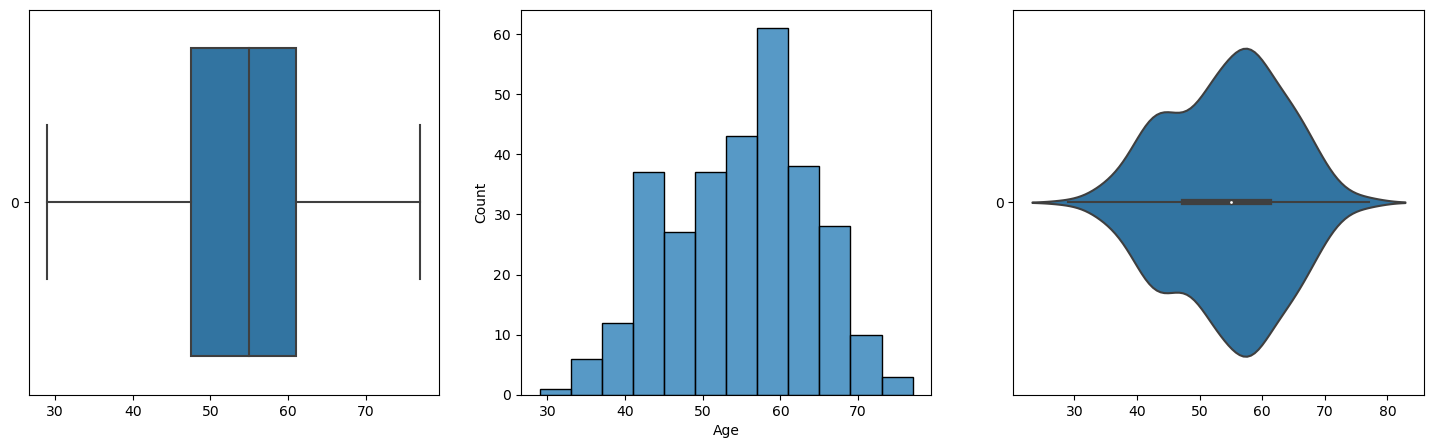

Age outliers: 0
Lower bound: 27.25
Upper bound: 81.25
Skewness of the Age variable: -0.202
The distribution is left-skewed.


In [447]:
univariateData(numericalData,'Age')

We can see that the median is around 55 years old  
The highest frequency of patients were around the age of 58  
The data distribution is left-skewed which implies that there is a higher concentration of older age patients

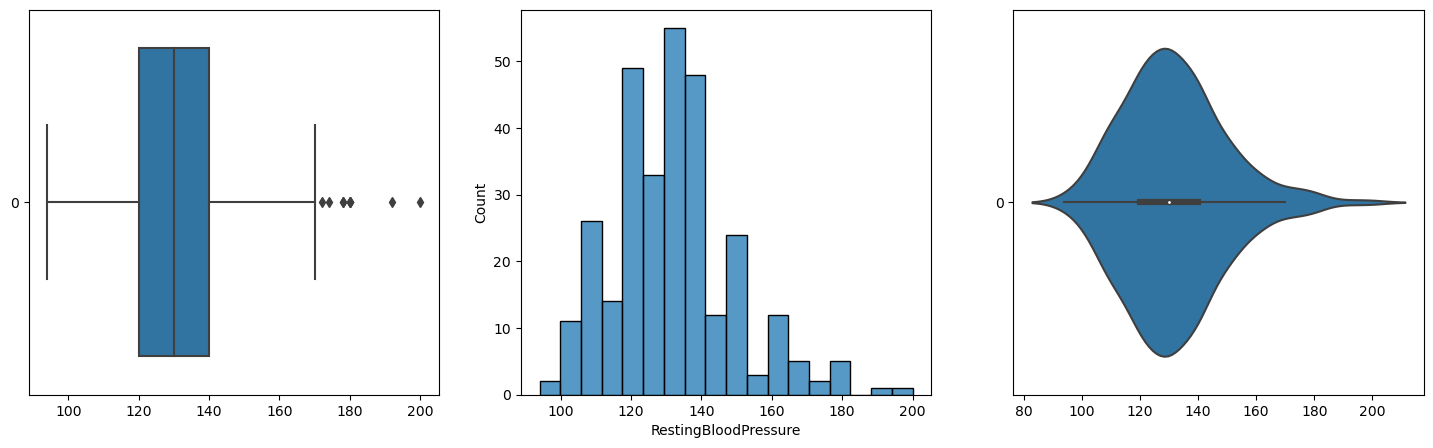

RestingBloodPressure outliers: 9
Lower bound: 90.0
Upper bound: 170.0
Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.


In [448]:
univariateData(numericalData,'RestingBloodPressure')

We can see that the median is around 131.62mmHg  
The highest frequency of `RestingBloodPressure` is around 130mmHg  
The data distribution is right-skewed implying that most patient tend to have lower `RestingBloodPressure`  
There are also 9 outliers which has a RestingBloodPressure of 170mmHg and above

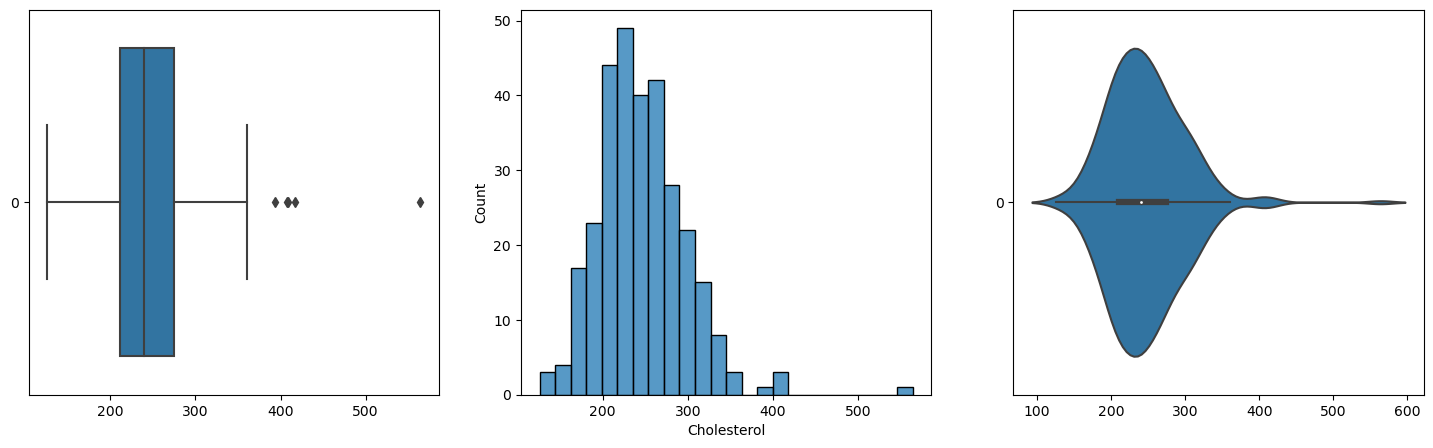

Cholesterol outliers: 5
Lower bound: 115.75
Upper bound: 369.75
Skewness of the Cholesterol variable: 1.143
The distribution is right-skewed.


In [449]:
univariateData(numericalData,'Cholesterol')

The median level of `cholesterol` is aound 240mg/dL  
The most frequent `cholesterol` level is around 220mg/dL  
The skewness of the `cholesterol` graph is right skewed whuch means a higher majority of people have a lower `cholesterol` level

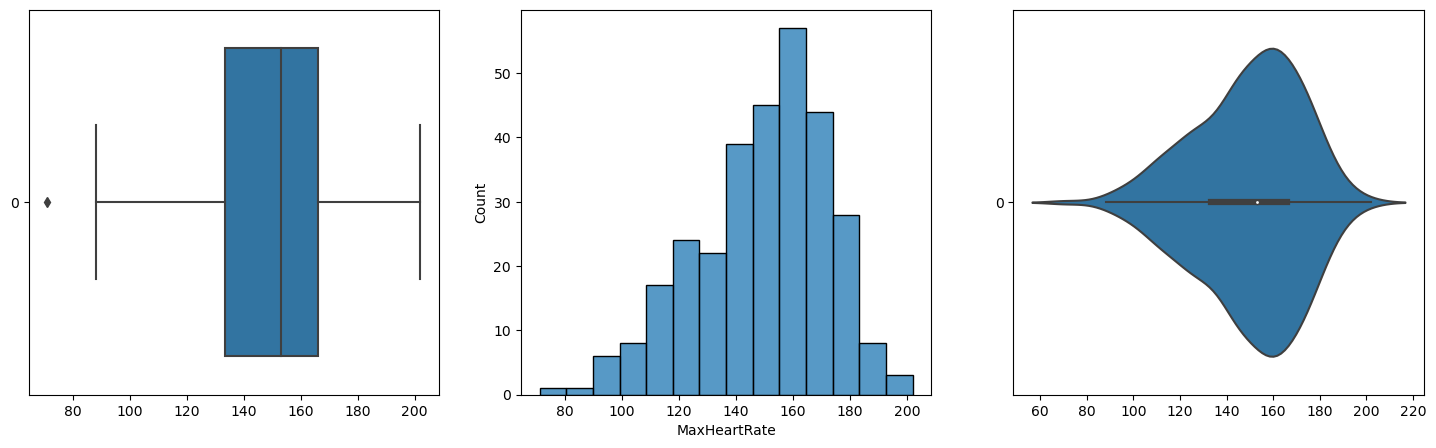

MaxHeartRate outliers: 1
Lower bound: 84.75
Upper bound: 214.75
Skewness of the MaxHeartRate variable: -0.537
The distribution is left-skewed.


In [450]:
univariateData(numericalData,'MaxHeartRate')

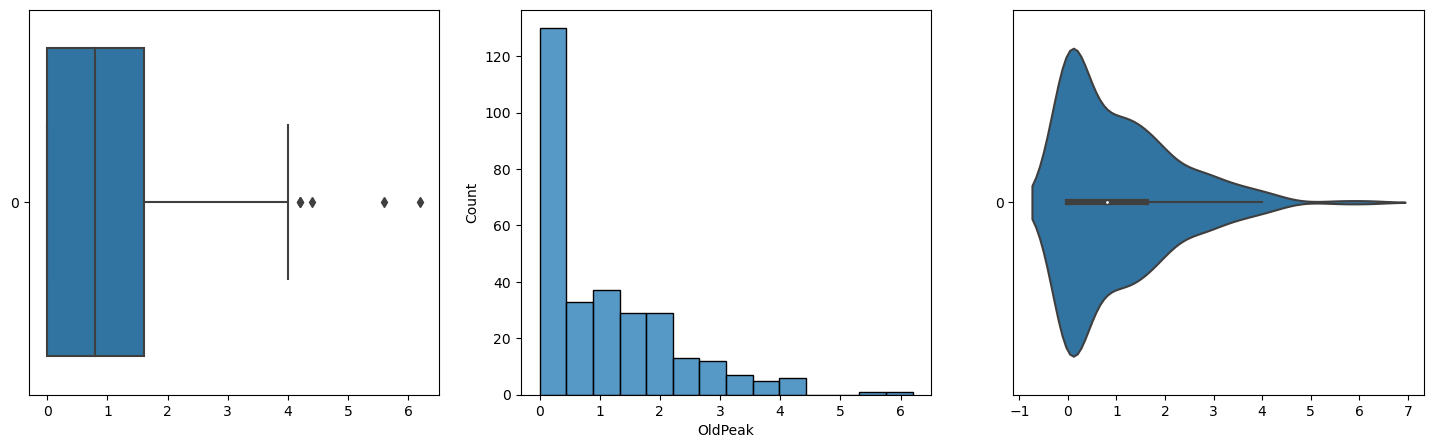

OldPeak outliers: 5
Lower bound: -2.4000000000000004
Upper bound: 4.0
Skewness of the OldPeak variable: 1.270
The distribution is right-skewed.


In [451]:
univariateData(numericalData,'OldPeak')   

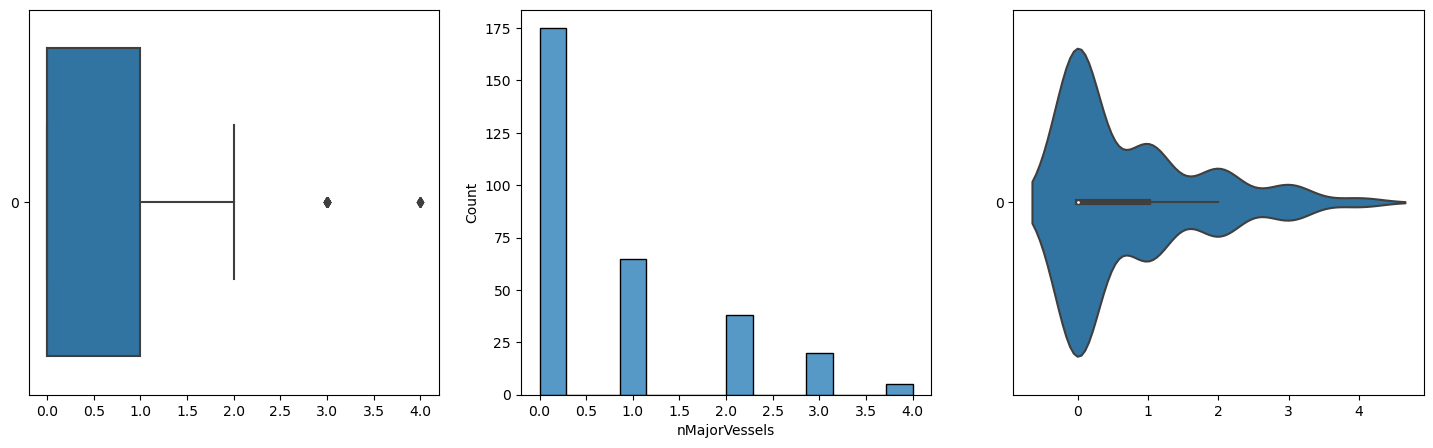

nMajorVessels outliers: 25
Lower bound: -1.5
Upper bound: 2.5
Skewness of the nMajorVessels variable: 1.310
The distribution is right-skewed.


In [452]:
univariateData(numericalData,'nMajorVessels')

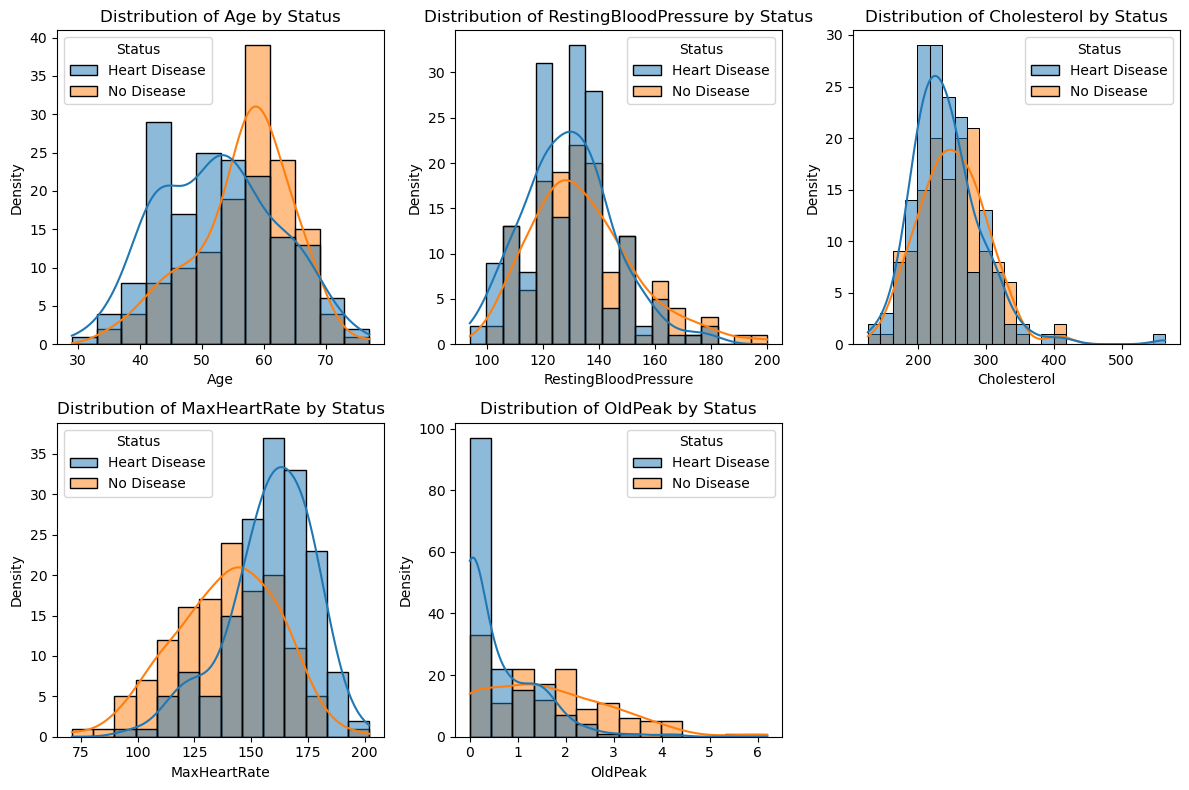

In [453]:
numerical_features = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sb.histplot(data=df, x=feature, hue='Status', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

axes[1, 2].remove()

plt.tight_layout()
plt.show()

Next, we will perform univariate analysis, for each categorical data variable

[Text(0, 0, '207'), Text(0, 0, '96')]

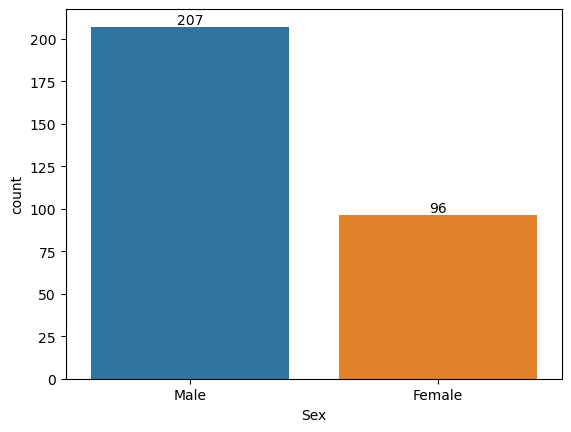

In [454]:
ax = sb.countplot(x ='Sex', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '23'), Text(0, 0, '87'), Text(0, 0, '50'), Text(0, 0, '143')]

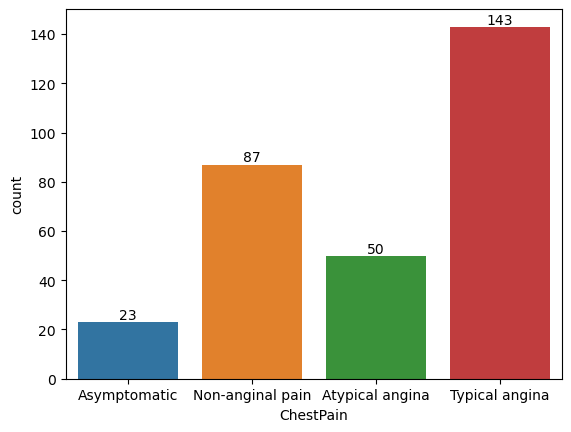

In [455]:
ax = sb.countplot(x ='ChestPain', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '258'), Text(0, 0, '45')]

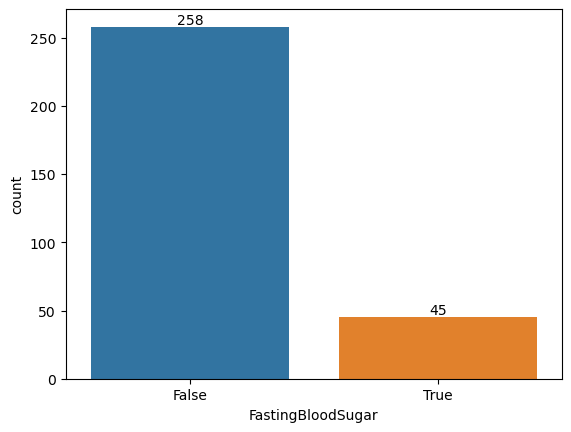

In [456]:
ax = sb.countplot(x ='FastingBloodSugar', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '147'), Text(0, 0, '152'), Text(0, 0, '4')]

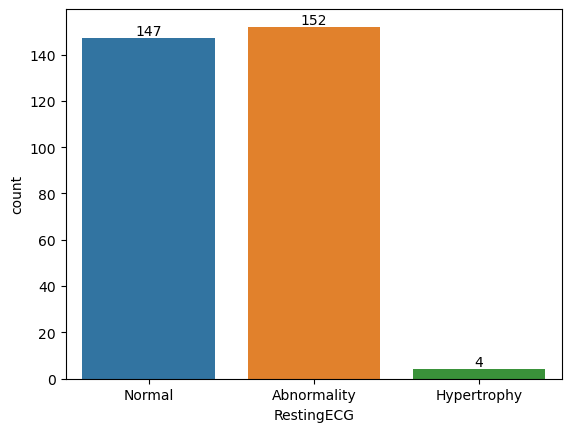

In [457]:
ax = sb.countplot(x ='RestingECG', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '204'), Text(0, 0, '99')]

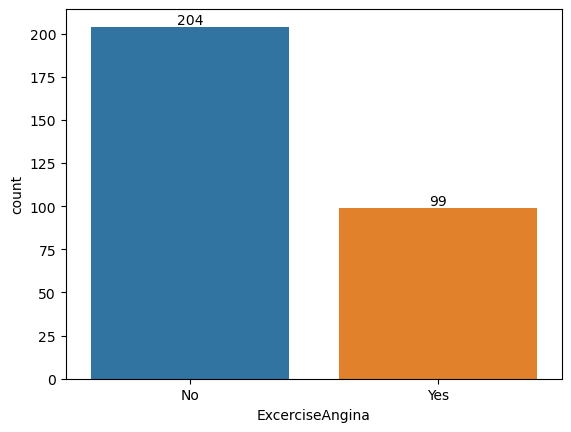

In [458]:
ax = sb.countplot(x ='ExcerciseAngina', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '21'), Text(0, 0, '142'), Text(0, 0, '140')]

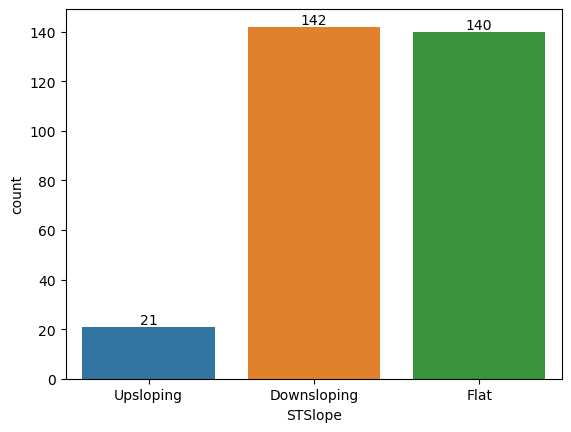

In [459]:
ax = sb.countplot(x ='STSlope', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '18'), Text(0, 0, '166'), Text(0, 0, '117'), Text(0, 0, '2')]

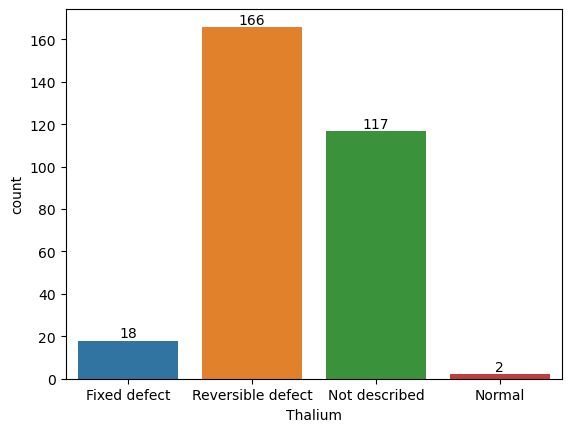

In [460]:
ax = sb.countplot(x ='Thalium', data = categoricalData)
ax.bar_label(ax.containers[0])

[Text(0, 0, '165'), Text(0, 0, '138')]

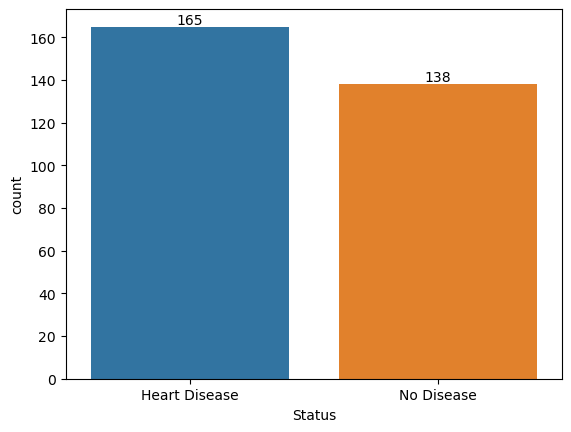

In [461]:
ax = sb.countplot(x ='Status', data = categoricalData)
ax.bar_label(ax.containers[0])

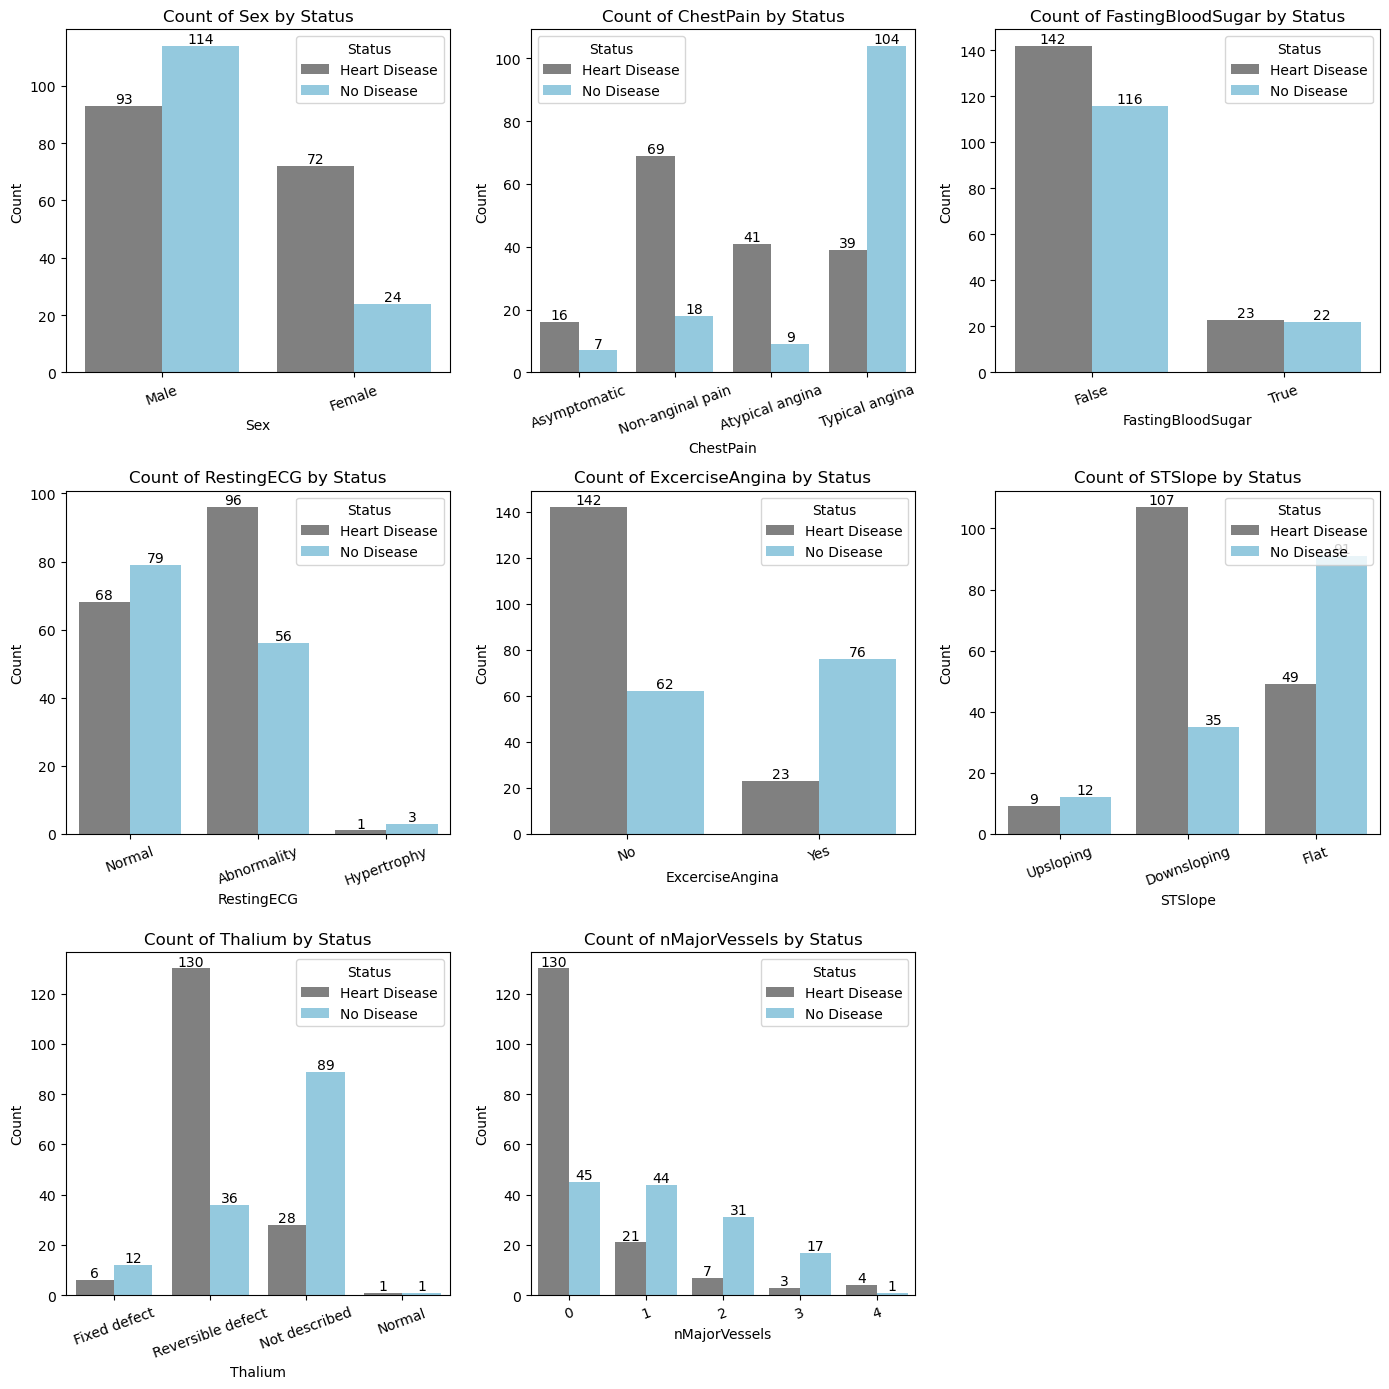

In [462]:
categorical_features = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExcerciseAngina', 'STSlope', 'Thalium', 'nMajorVessels']

num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 14))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sb.countplot(data=df, x=feature, hue='Status', ax=ax, palette={'Heart Disease': 'grey', 'No Disease': 'skyblue'})
    ax.set_title(f'Count of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    color='black')

for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

## Step 5 Preprocessing 
Check for outlier in data

In [463]:
for data in numericalData:
    x,q1,q3 = find_outliers_IQR(numericalData[data])
    print(data + " outliers: " + str(x))

Age outliers: 0
RestingBloodPressure outliers: 9
Cholesterol outliers: 5
MaxHeartRate outliers: 1
OldPeak outliers: 5
nMajorVessels outliers: 25


The outliers for nMajorVessels is quite high as despite it being a numerical data, it acts more like a categorical data, therefore the outliers for this variable can be ignored

Since the dataset is quite small at roughly 303 data samples, we should avoid removing samples. Instead we can consider using transformation to better normalise and reduce the skewness in the data.

Since numerical variables may have high skewed and non-normal distribution (Gaussian Distribution) can be by outliers, highly exponential distributions, etc. Transformation can be applied to reduce the skewness of the data.
A total of 5 transformation can be considered.  
1. Log Transformation
2. Square-root transformation
3. Reciprocal transformation
4. Box-Cox Transformation
5. Yeo-Johnson transformation

Overall, Box-cox transformation was choosen as it works well for many different datas.  
All the actual "numerical data" is transformed.  
nMajorVessels is left out as it is not really a numerical data, it is a catorigical data with numerical values.

A function is created to automatically apply the Box-Cox transformation to the specified numerical variables  
in our dataFrame, by finding the optimal lambda value for each variable.  
It enhances data distribution for machine learning by addressing skewness and variance issues.

In [464]:
def boxcoxTransformation(df):
    boxcox_df = df.copy()
    transformationList = ["Age", "RestingBloodPressure", "Cholesterol", "MaxHeartRate", "OldPeak"]
    for var in transformationList:
        if np.any(df[var] <= 0):
            min_value = abs(df[var].min()) + 1
            df[var] += min_value
        boxcoxTransform, lambda_value = boxcox(df[var])
        boxcox_df[var] = boxcoxTransform
        
    return boxcox_df

Next, we want to create a function to display the comparision between pre-transformed data and post-transformed data to visualise the differences

In [465]:
def plot_transformed_graph(df, postTransform, variable):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

    # Original data plots
    sb.boxplot(x=df[variable], ax=axes[0, 0], color='#9DC4E8') 
    axes[0, 0].set_title(f"Original {variable}")

    sb.violinplot(x=df[variable], ax=axes[0, 1], color='#9DC4E8') 
    axes[0, 1].set_title(f"Original {variable}")

    sb.histplot(df[variable], ax=axes[0, 2], kde=True, color='#9DC4E8')  
    axes[0, 2].set_title(f"Original {variable}")

    # Transformed data plots
    sb.boxplot(x=postTransform[variable], ax=axes[1, 0], color='#00308F') 
    axes[1, 0].set_title(f"Transformed {variable}")

    sb.violinplot(x=postTransform[variable], ax=axes[1, 1], color='#00308F') 
    axes[1, 1].set_title(f"Transformed {variable}")

    sb.histplot(postTransform[variable], ax=axes[1, 2], kde=True, color='#00308F') 
    axes[1, 2].set_title(f"Transformed {variable}")
    
    # Hide unnecessary subplot
    axes[2, 0].axis('off')
    axes[2, 1].axis('off')
    axes[2, 2].axis('off')

    plt.tight_layout()
    plt.show()

In [466]:
boxcoxTransform = boxcoxTransformation(df)


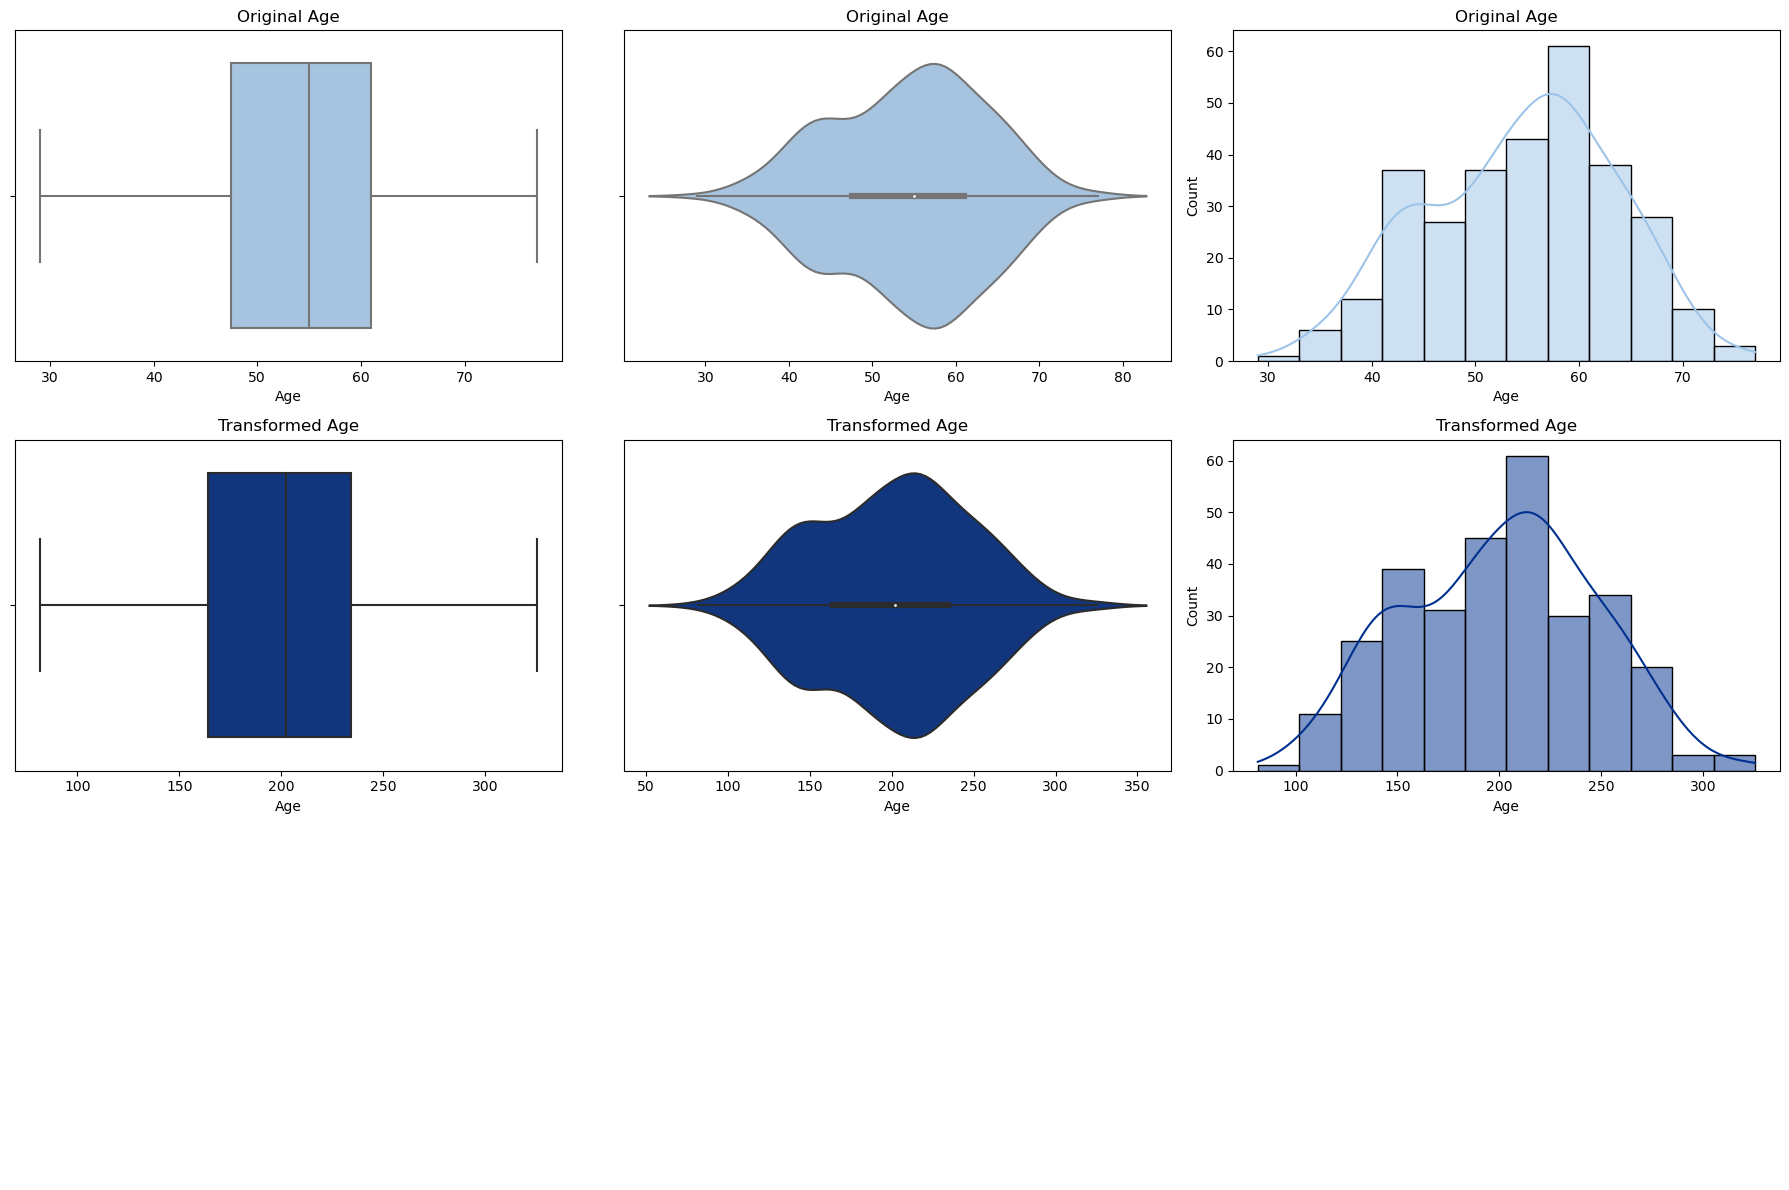

In [467]:
plot_transformed_graph(df, boxcoxTransform, 'Age')

In [468]:
skewness_dist(df, "Age")

Skewness of the Age variable: -0.202
The distribution is left-skewed.


In [469]:
skewness_dist(boxcoxTransform, "Age")

Skewness of the Age variable: -0.053
The distribution is left-skewed.


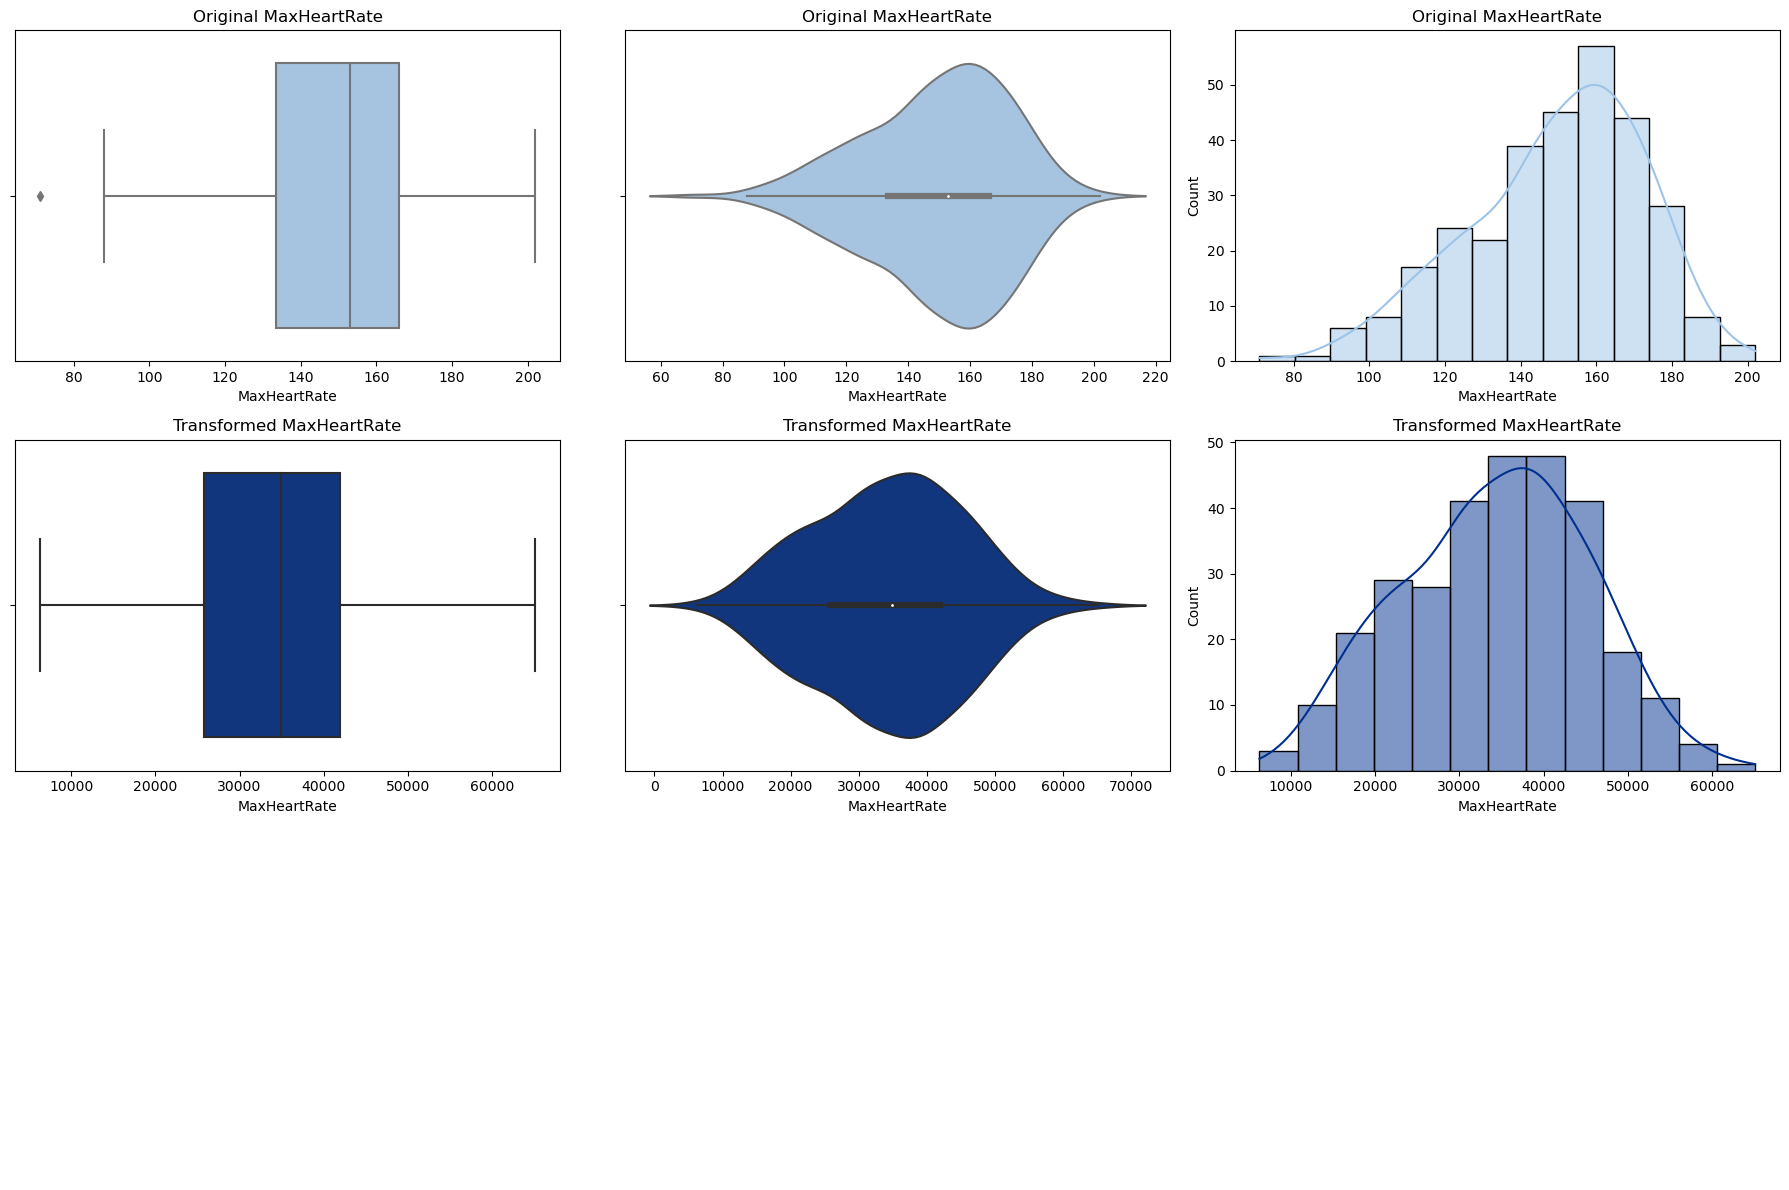

In [470]:
plot_transformed_graph(df, boxcoxTransform, 'MaxHeartRate')

In [471]:
skewness_dist(df, "MaxHeartRate")
skewness_dist(boxcoxTransform, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.537
The distribution is left-skewed.
Skewness of the MaxHeartRate variable: -0.075
The distribution is left-skewed.


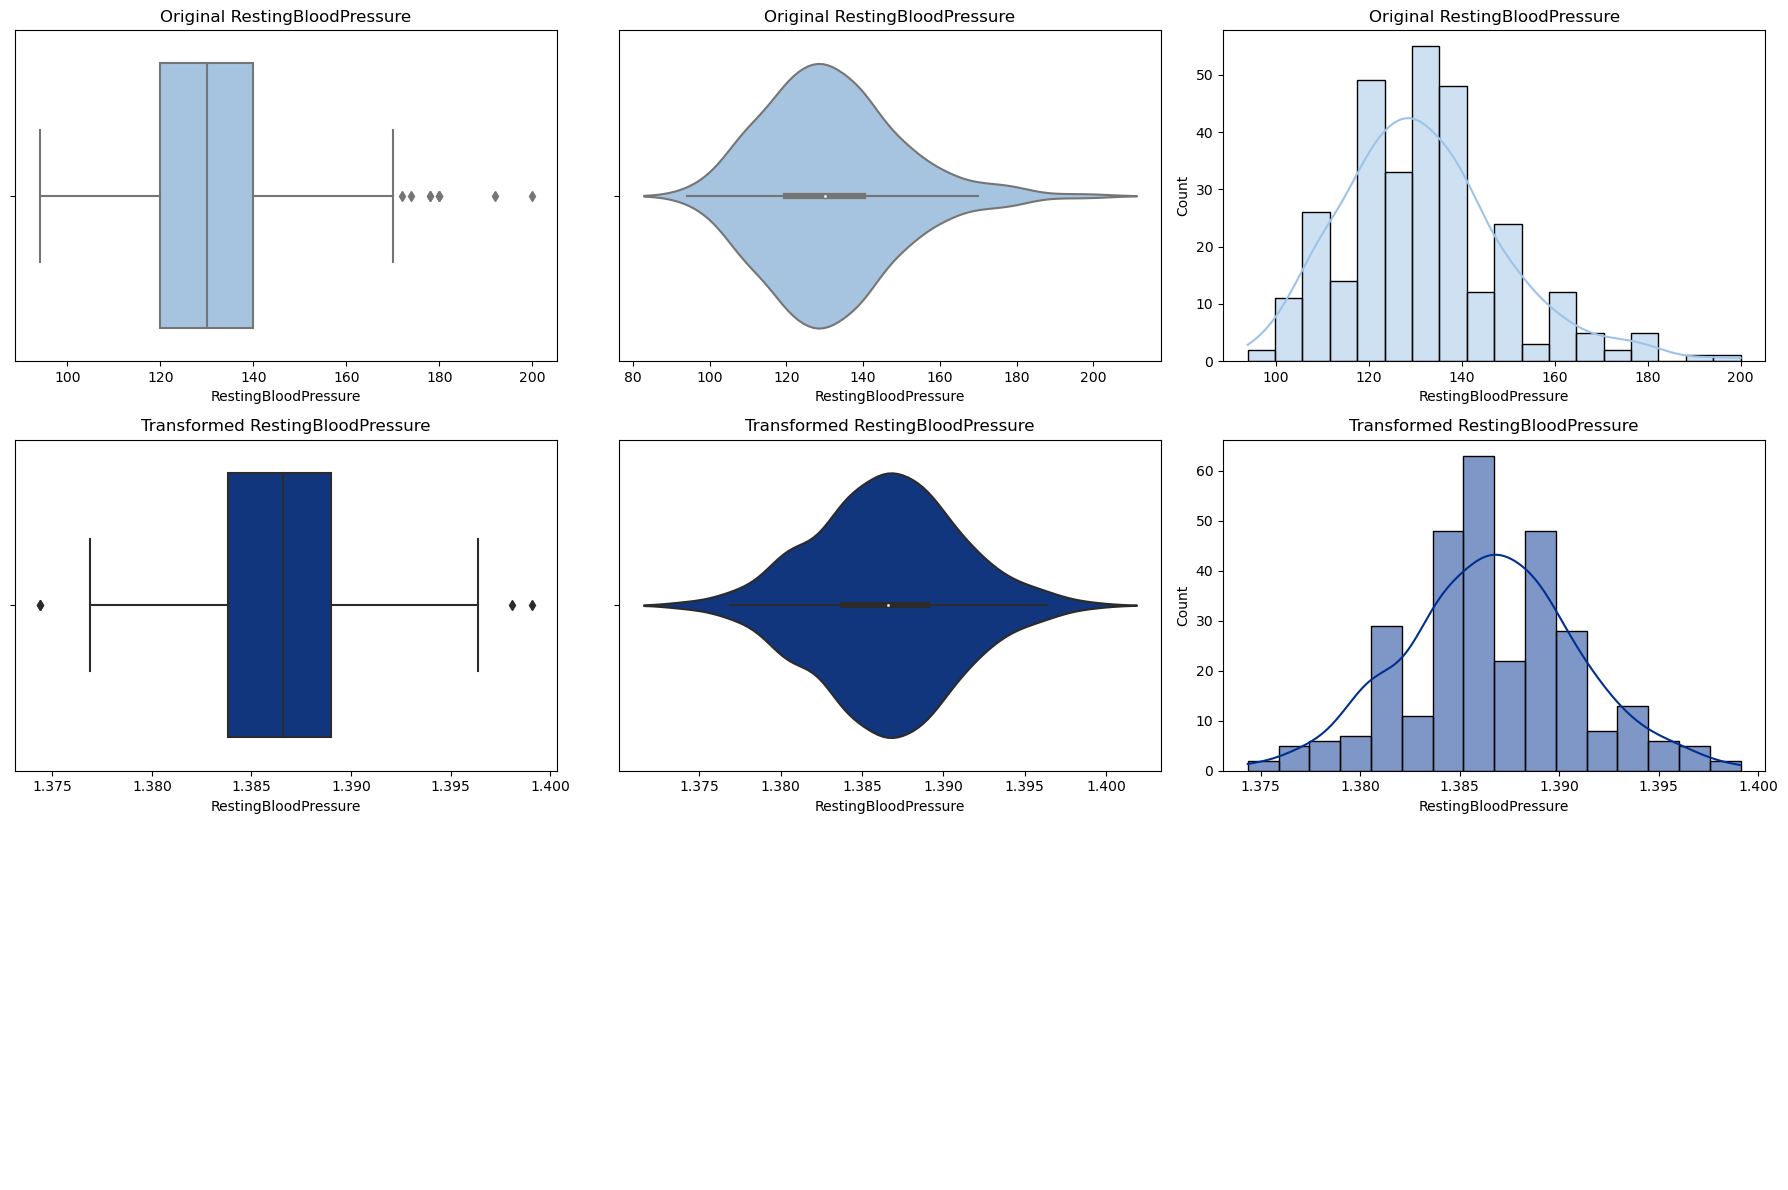

In [472]:
plot_transformed_graph(df, boxcoxTransform, 'RestingBloodPressure')

In [473]:
skewness_dist(df, "RestingBloodPressure")
skewness_dist(boxcoxTransform, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.
Skewness of the RestingBloodPressure variable: -0.001
The distribution is left-skewed.


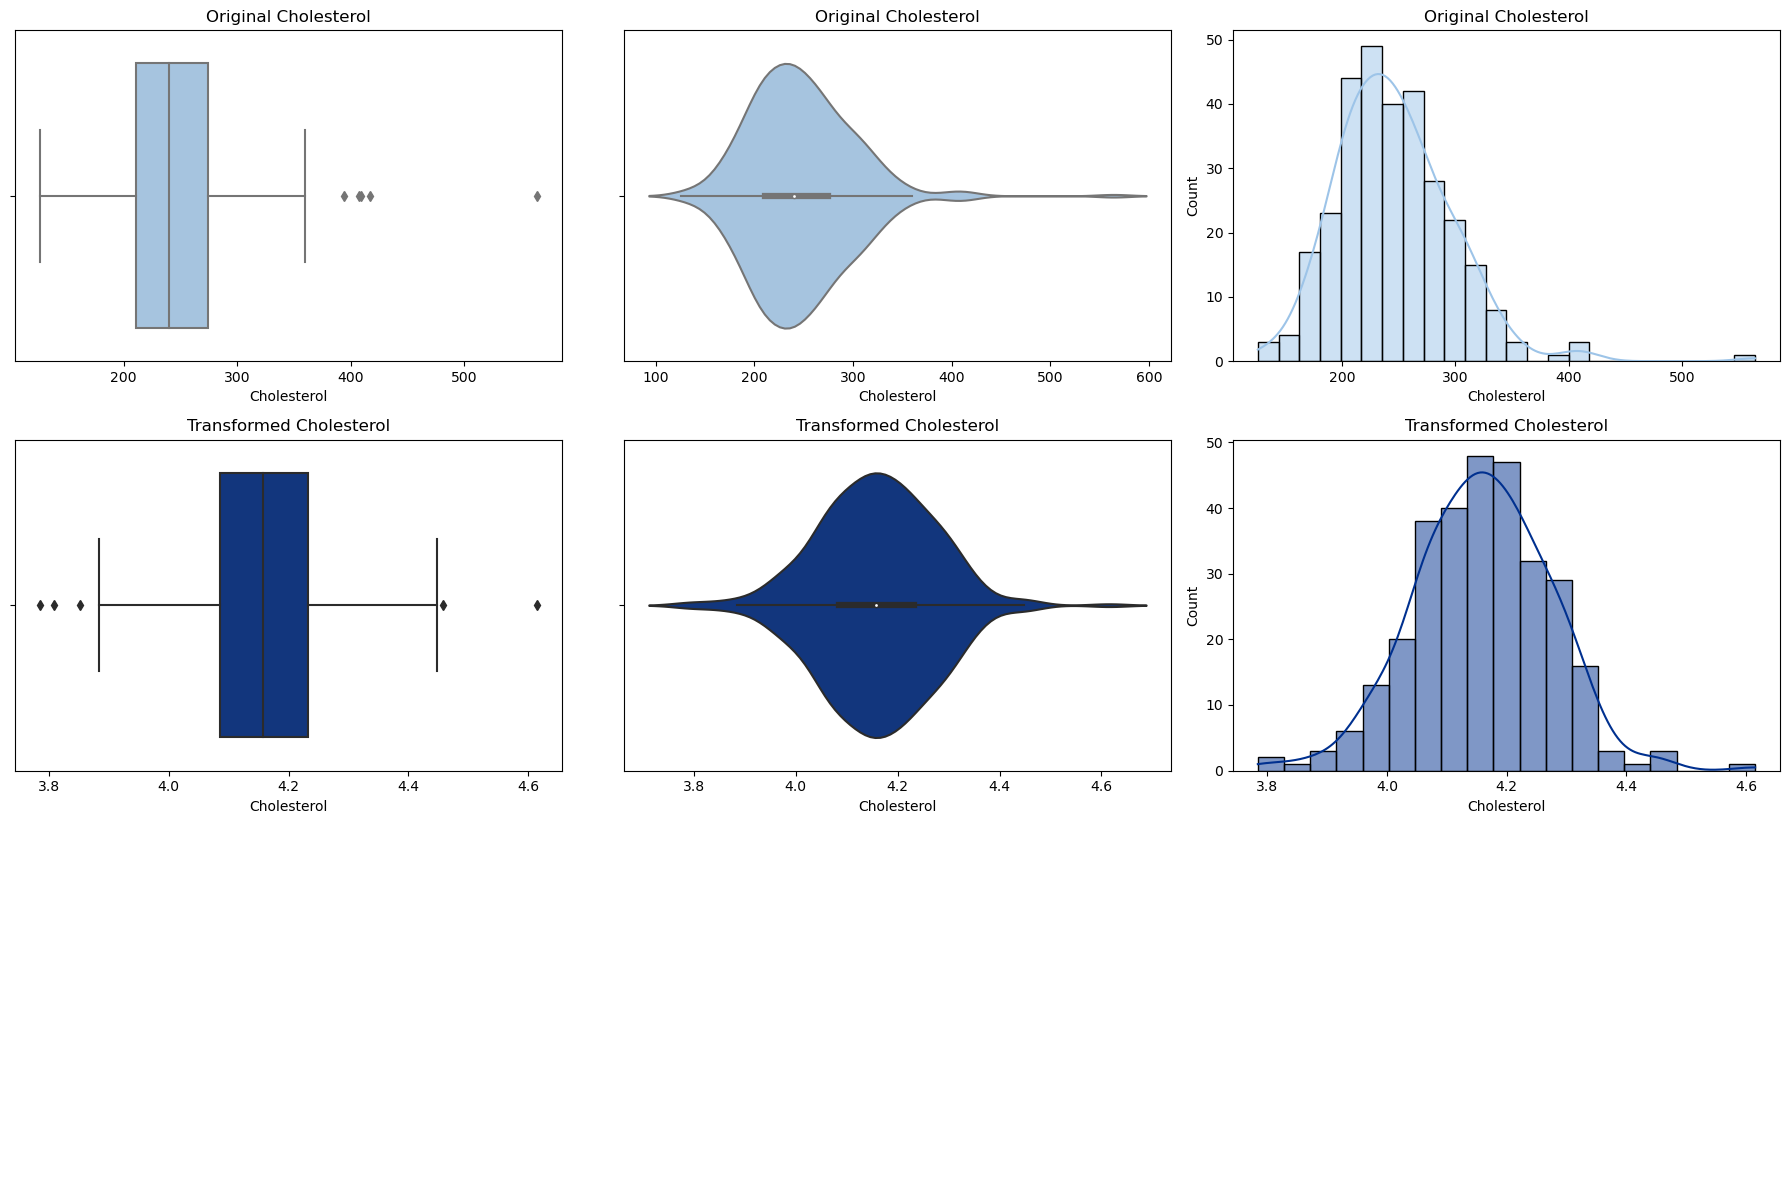

In [474]:
plot_transformed_graph(df, boxcoxTransform, 'Cholesterol')

In [475]:
skewness_dist(df, "RestingBloodPressure")
skewness_dist(boxcoxTransform, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.
Skewness of the RestingBloodPressure variable: -0.001
The distribution is left-skewed.


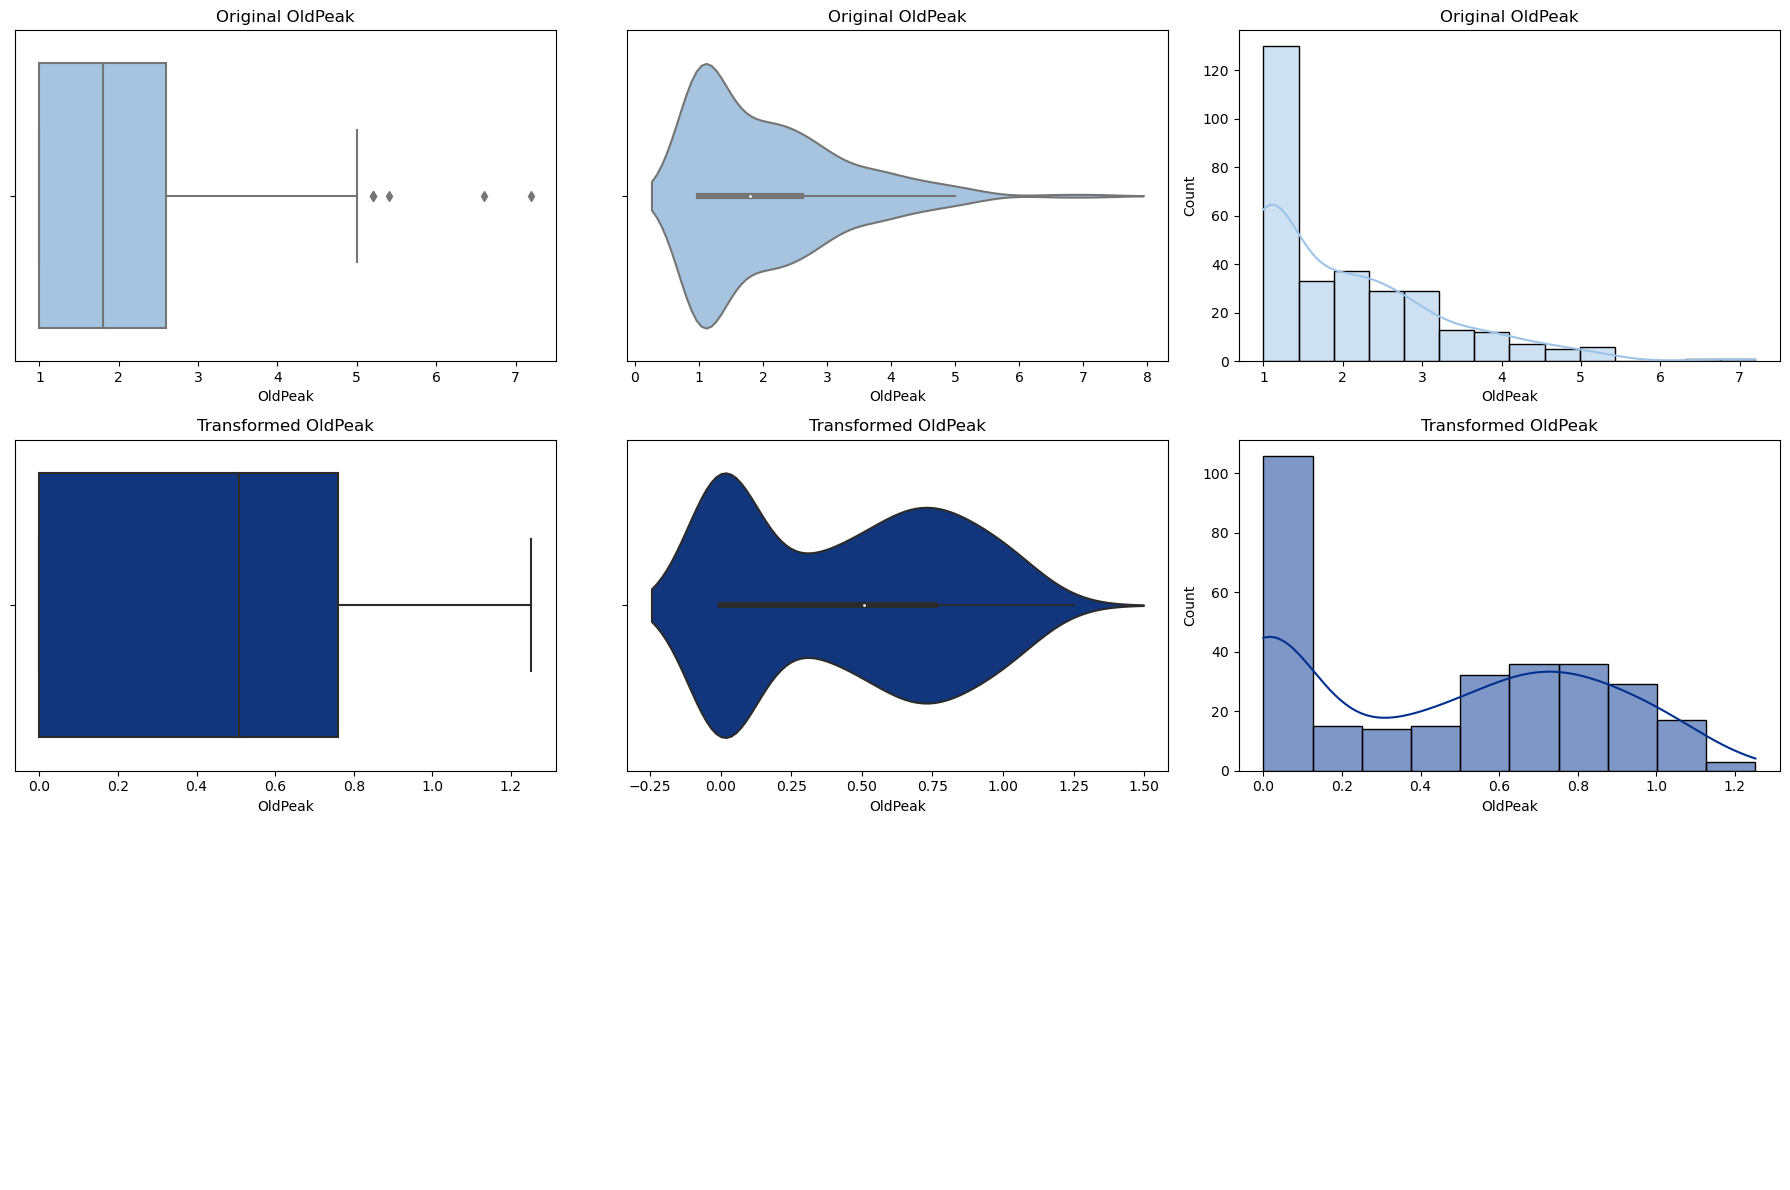

In [476]:
plot_transformed_graph(df, boxcoxTransform, 'OldPeak')

In [477]:
skewness_dist(df, "OldPeak")
skewness_dist(boxcoxTransform, "OldPeak")

Skewness of the OldPeak variable: 1.270
The distribution is right-skewed.
Skewness of the OldPeak variable: 0.124
The distribution is right-skewed.


In [478]:
columns_of_interest = ["Age", "RestingBloodPressure", "Cholesterol", "MaxHeartRate", "OldPeak"]

for column in columns_of_interest:
    x,q1,q3 = find_outliers_IQR(boxcoxTransform[column])
    print(column + " outliers: " + str(x))

Age outliers: 0
RestingBloodPressure outliers: 4
Cholesterol outliers: 5
MaxHeartRate outliers: 0
OldPeak outliers: 0


Check for NULL values

Make a copy of the variables

In [479]:
transformed = boxcoxTransform.copy()
df_copy = df.copy()

In [480]:
df.isnull().sum()

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

Check for dupliacted data

In [481]:
duplicated_rows = df.duplicated()
df[duplicated_rows]

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
164,38,Male,Non-anginal pain,138,175,False,Abnormality,173,No,1.0,Downsloping,4,Reversible defect,Heart Disease


Drop that row in both the original data frame as well as the transformed data

In [482]:
df.drop(index=164, axis=0, inplace=True)
transformed.drop(index=164, axis=0, inplace=True)

## Step 6 Encoding categorical variables as numerical

Conversion of data from categorical to numerical for easier analysis

In [483]:
features_to_encode = ["ChestPain", "RestingECG", "STSlope", "Thalium"]

We will perform one hot encoding by using **get_dummies** to convert all the categorical data with more than 2 types into different columns of boolean data, 1 represents true, and 0 represents false.  

In [484]:
df = pd.get_dummies(df, columns=features_to_encode)

In [485]:
transformed = pd.get_dummies(transformed, columns=features_to_encode)

We will convert the boolean data back into integer data for easier processing

In [486]:
bool_columns = transformed.select_dtypes(include=bool).columns
transformed[bool_columns] = transformed[bool_columns].astype("int64")

bool_columns2 = df.select_dtypes(include=bool).columns
df[bool_columns2] = df[bool_columns2].astype("int64")

Next, we want to convert cateogrical data with only 2 types into **1** and **0**

In [487]:
label_encoder = LabelEncoder()

features_to_encode = ['Sex', 'FastingBloodSugar', 'ExcerciseAngina', 'Status']

for feature in features_to_encode:
    transformed[feature] = label_encoder.fit_transform(transformed[feature])
    
for feature in features_to_encode:
    df[feature] = label_encoder.fit_transform(df[feature])

In [488]:
transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         302 non-null    float64
 1   Sex                         302 non-null    int32  
 2   RestingBloodPressure        302 non-null    float64
 3   Cholesterol                 302 non-null    float64
 4   FastingBloodSugar           302 non-null    int32  
 5   MaxHeartRate                302 non-null    float64
 6   ExcerciseAngina             302 non-null    int32  
 7   OldPeak                     302 non-null    float64
 8   nMajorVessels               302 non-null    int64  
 9   Status                      302 non-null    int32  
 10  ChestPain_Asymptomatic      302 non-null    int64  
 11  ChestPain_Atypical angina   302 non-null    int64  
 12  ChestPain_Non-anginal pain  302 non-null    int64  
 13  ChestPain_Typical angina    302 non-null

## Step 7 Correlation analysis

Now that all the data are numerical, we can use a correlation matrix to check for correlation between different data.

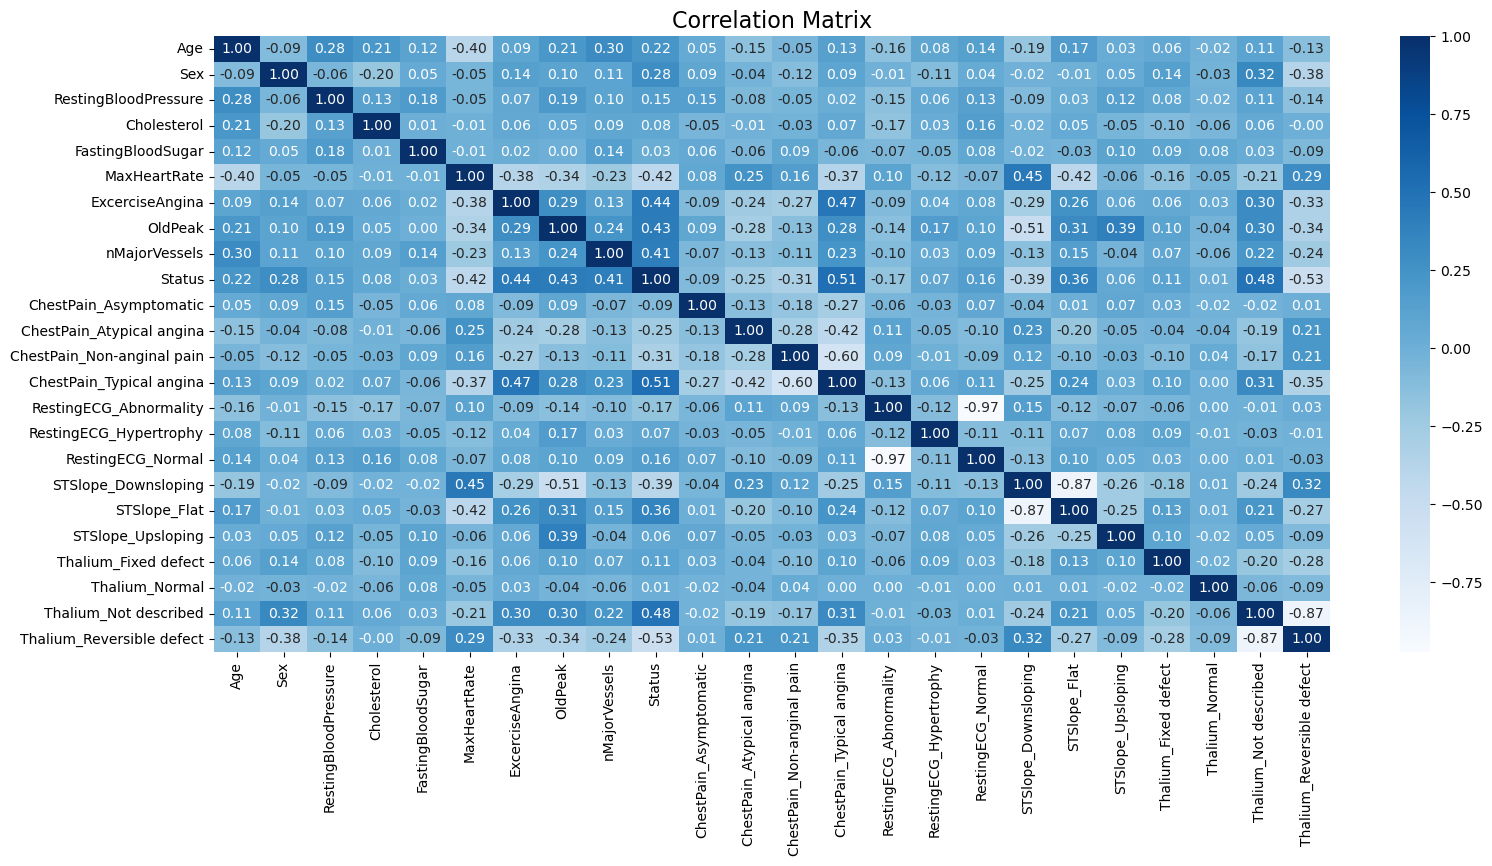

In [489]:
df_correlation = df.corr()

plt.figure(figsize=(18, 8))
heatmap = sb.heatmap(df_correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Base on the correlation matrix above, we can see that each categorical columns with more than 2 categories introduces an individual column to the data. Since our goal to is observe which variable has the highest correlation to **Status** which represents people with heart disease.  
We can observe that for the newly encoded categorical columns,  
**ChestPain_Asymtomatic** only has a correlation score of **-0.09** to **Status**  
**RestingECG_Hypertrophy** only has a correlation score of **0.07** to **Status**  
**STSlope_Upsloping** only has a correlation score of **0.06** to **Status**  
**Thalium_Normal** only has a correlation score of **0.01** to **Status**  
Therefore, we should drop these columns

Next, we want to create copies of **df** to test the different effects of scaling and transformation for the models.  
**transformed** will be the data with **box-cot transformed** data and **scaling**  
**df2** will be the dataframe with **non-transformed** data and **scaling**    
**df3** will be the dataframe with **box-cot transformed** data but **no scaling**  
**df3_no_transformed** will be the dataframe with **non-transformation** data and **no scaling**

In [490]:
df2 = df.copy()

In [491]:
df2.drop(["ChestPain_Asymptomatic", "RestingECG_Hypertrophy", "STSlope_Upsloping", "Thalium_Normal"], axis=1, inplace=True)
transformed.drop(["ChestPain_Asymptomatic", "RestingECG_Hypertrophy", "STSlope_Upsloping", "Thalium_Normal"], axis=1, inplace=True)

df3_no_transformed = df2.copy()
df3 = transformed.copy()

## Step 8 Scaling the data

Since there were outliers previously on numerical features, standardisation is done to reduce outliers in the data.  
**df2** and **transformed** is scaled here.  

In [492]:
features_to_scale = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak', 'nMajorVessels']

scaler = StandardScaler()

scaler.fit(transformed[features_to_scale])


##transformed_scaled = scaler.transform(transformed[features_to_scale])
##transformed[features_to_scale] = transformed_scaled 

StandardScaler()

In [493]:
transformed[features_to_scale] = scaler.fit_transform(transformed[features_to_scale])
df2[features_to_scale] = scaler.fit_transform(df[features_to_scale])

## Step 9 Models
Using different models, determine which one is the most effective in generating an accurate prediction

Create a function for splitting datasets into train and test

In [494]:
def custom_split(df, test_size=0.3, random_state=24):
    # Splitting the dataset into features (X) and target labels (y)
    X = df.drop(columns=['Status'])
    y = df['Status']

    # Performing random split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [495]:
df2_X_train, df2_X_test, df2_y_train, df2_y_test = custom_split(df2)
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test= custom_split(transformed)

Next, we will print the sample of data to check if it correspond to the correct partition allocated

In [496]:
total_samples = len(df2_X_train) + len(df2_X_test)
percent_train = (len(df2_X_train) / total_samples) * 100
percent_test = (len(df2_X_test) / total_samples) * 100

print(f"Percentage of data used for training: {percent_train:.2f}%")
print(f"Percentage of data used for testing: {percent_test:.2f}%")

Percentage of data used for training: 69.87%
Percentage of data used for testing: 30.13%


In [497]:
print(len(df2_X_train), len(df2_X_test), len(df2_y_train), len(df2_y_test))

211 91 211 91


In [498]:
(pd.DataFrame(df2_y_train)).value_counts()

Status
0         115
1          96
Name: count, dtype: int64

Data splits on transformed data no scaling (**df3**)

In [499]:
df3_X_train, df3_X_test, df3_y_train, df3_y_test = custom_split(df3) 

Data splits performed on dataframe with no transformation no scaling (**df3_no_transformed**)

In [500]:
df3_tr_X_train, df3_tr_X_test, df3_tr_y_train, df3_tr_y_test = custom_split(df3_no_transformed)

SVM (Support Vector Machine)

For support vector machines, there are about 15 hyperparamter tuning options, but I in this case, I will be focusing on testing the hyperparameters for different types of kernal and C values.

The C parameter is inversely proportional to the margin size, this means that the larger the value of C, the smaller the margin, and, conversely, the smaller the value of C, the larger the margin.

Choices of kernals: **linear**, **poly**, **rbf**, **sigmoid**, **precomputed**  
Choice for C: **0.1** - **1**

In [501]:
def train_svm_model(X_train, X_test, y_train, y_test, kernel='rbf', C=1.0):
    # Instantiate SVM classifier
    svm_model = SVC(kernel=kernel, C=C)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on training and testing data
    train_preds = svm_model.predict(X_train)
    test_preds = svm_model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    return train_accuracy, test_accuracy

Next, we create another function to test different hyperparameters for the model

In [502]:
from itertools import product

def svm_hyperparameter_tuning(X_train, X_test, y_train, y_test, kernels=['rbf', 'linear', 'poly', 'sigmoid'], 
                              C_start=0.1, C_end=1.0, C_step=0.1):
    results = []

    # Generate C values in the specified range with the given step size
    C_values = [round(C, 1) for C in np.arange(C_start, C_end + C_step, C_step)]

    # Iterate over all combinations of kernels and C values
    for kernel, C in product(kernels, C_values):
        train_accuracy, test_accuracy = train_svm_model(X_train, X_test, y_train, y_test, kernel=kernel, C=C)
        results.append((kernel, C, train_accuracy, test_accuracy))

    return results

Next, we will create a function for printing out the different types of hyperparameters tested for SVM.

In [503]:
def plot_svm_results(original_results, transformed_results):
    original_kernels = set(result[0] for result in original_results)
    transformed_kernels = set(result[0] for result in transformed_results)

    fig, axs = plt.subplots(max(len(original_kernels), len(transformed_kernels)), 2, figsize=(16, 8))

    # Plot results for original data
    for i, kernel in enumerate(original_kernels):
        # Filter results for the current kernel
        kernel_original_results = [result for result in original_results if result[0] == kernel]

        ax = axs[i, 0] if len(original_kernels) > 1 else axs[0]
        C_values = [result[1] for result in kernel_original_results]
        train_accuracies = [result[2] for result in kernel_original_results]
        test_accuracies = [result[3] for result in kernel_original_results]

        ax.plot(C_values, train_accuracies, label='Train Accuracy', marker='o')
        ax.plot(C_values, test_accuracies, label='Test Accuracy', marker='x')

        ax.set_title(f'SVM with {kernel.capitalize()} Kernel - Original Data')
        ax.set_xlabel('C')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True)
        ax.set_xticks(C_values)  # Use C_values directly on x-axis
        ax.tick_params(axis='x', rotation=90)

    # Plot results for transformed data
    for i, kernel in enumerate(transformed_kernels):
        # Filter results for the current kernel
        kernel_transformed_results = [result for result in transformed_results if result[0] == kernel]

        ax = axs[i, 1] if len(transformed_kernels) > 1 else axs[1]
        C_values = [result[1] for result in kernel_transformed_results]
        train_accuracies = [result[2] for result in kernel_transformed_results]
        test_accuracies = [result[3] for result in kernel_transformed_results]

        ax.plot(C_values, train_accuracies, label='Train Accuracy', marker='o')
        ax.plot(C_values, test_accuracies, label='Test Accuracy', marker='x')

        ax.set_title(f'SVM with {kernel.capitalize()} Kernel - Transformed Data')
        ax.set_xlabel('C')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True)
        ax.set_xticks(C_values)  # Use C_values directly on x-axis
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

Next, we will compare the results between df2 and transformed to see the differences between using box-cott transformation

In [504]:
svmtransformedResult = svm_hyperparameter_tuning(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)
svmdf2Result = svm_hyperparameter_tuning(df2_X_train, df2_X_test, df2_y_train, df2_y_test)


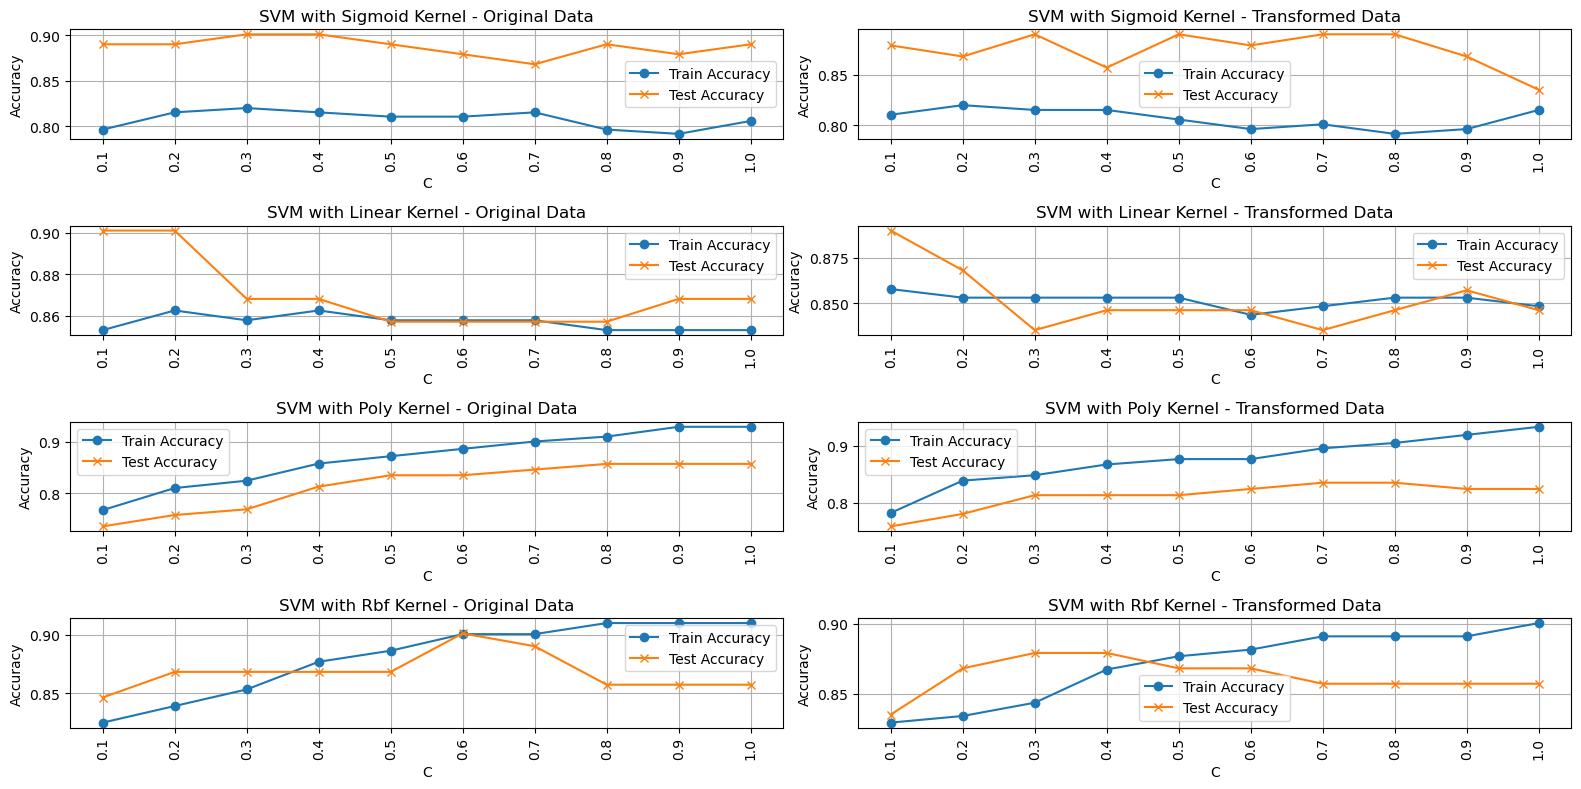

In [505]:
plot_svm_results(svmdf2Result,svmtransformedResult)

The results are mixed, for some of the data, the non-transformed data performs better while sometimes, the transform data performs better. Therefore, we will evaluate the models using confusion matrix to evaluate the performance.

However, we can observe that some data points are better.
1. SVM using **sigmoid** with **c = 0.3**   
2. SVM using **linear** with **c = 0.2**  
3. SVM using **poly** with **c= 0.4**  
4. SVM using **rbf** with **c = 0.3**

In [506]:
def create_svm_model(X_train, y_train, kernel, C):
    
    svm_clf = SVC(kernel=kernel, C=C)
    svm_clf.fit(X_train, y_train)
    return svm_clf

def plot_confusion_matrices(y_trues, y_preds, titles):

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    for i, (y_true, y_pred, title) in enumerate(zip(y_trues, y_preds, titles)):
        conf_matrix = confusion_matrix(y_true, y_pred)
        sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[i])
        axs[i].set_title(title)
        axs[i].set_xlabel('Predicted Label')
        axs[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

def print_classification_report(y_true, y_pred, title):

    print(f"Classification Report - {title}:")
    print(classification_report(y_true, y_pred))

Evaluating the SVM model using the **sigmoid** kernal, C = **0.3** for both original and transformed data

In [507]:
svm_model = create_svm_model(df2_X_train, df2_y_train, kernel='sigmoid', C=0.3)
svm_model_transformed = create_svm_model(transformed_X_train, transformed_y_train, kernel='sigmoid', C=0.3)

In [508]:
train_predictions_df2 = svm_model.predict(df2_X_train)
test_predictions_df2 = svm_model.predict(df2_X_test)

train_predictions_transformed = svm_model.predict(transformed_X_train)
test_predictions_transformed = svm_model.predict(transformed_X_test)

Original data


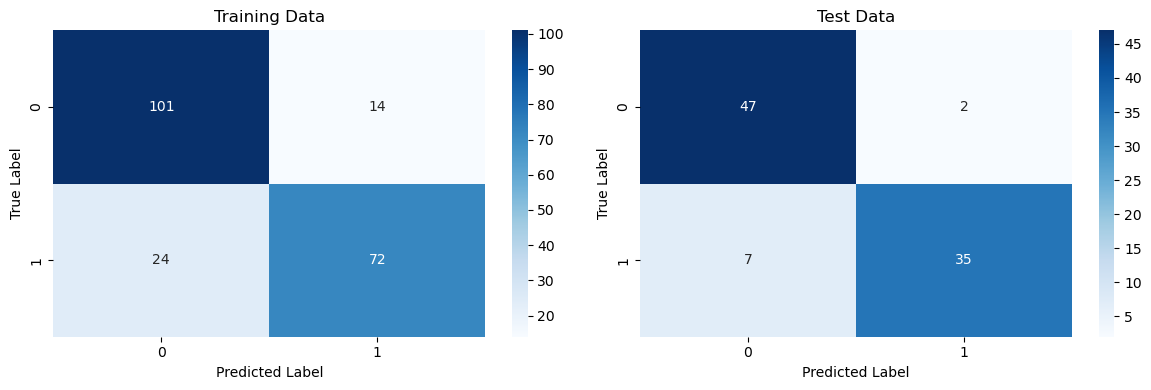

Transformed data


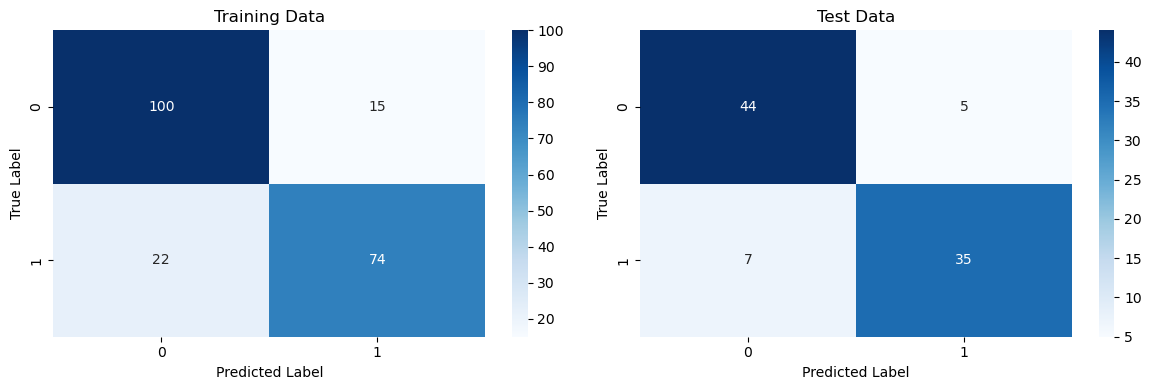

In [509]:
print("Original data")
plot_confusion_matrices([df2_y_train, df2_y_test], [train_predictions_df2, test_predictions_df2], ['Training Data', 'Test Data'])
print("Transformed data")
plot_confusion_matrices([transformed_y_train, transformed_y_test], [train_predictions_transformed, test_predictions_transformed], ['Training Data', 'Test Data'])


Using sklearn, we can use their classification report function to display:  
1. Precision: Percentage of correct positive predictions relative to total positive predictions.  
2. Recall: Percentage of correct positive predictions relative to total actual positives.  
3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.  
4. Support: These values simply tell us how many players belonged to each class.

In [510]:
print_classification_report(df2_y_train, train_predictions_df2, title='Training Data')
print_classification_report(df2_y_test, test_predictions_df2, title='Test Data')

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       115
           1       0.84      0.75      0.79        96

    accuracy                           0.82       211
   macro avg       0.82      0.81      0.82       211
weighted avg       0.82      0.82      0.82       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        49
           1       0.95      0.83      0.89        42

    accuracy                           0.90        91
   macro avg       0.91      0.90      0.90        91
weighted avg       0.91      0.90      0.90        91



Printing the classification report for transformed data

In [511]:
print_classification_report(transformed_y_train, train_predictions_transformed, title='Training Data')
print_classification_report(transformed_y_test, test_predictions_transformed, title='Test Data')

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       115
           1       0.83      0.77      0.80        96

    accuracy                           0.82       211
   macro avg       0.83      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        49
           1       0.88      0.83      0.85        42

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



Evaluating the SVM model using the **poly** kernal, C = **0.4**

In [512]:
svm_model = create_svm_model(df2_X_train, df2_y_train, kernel='poly', C=0.4)
svm_model_transformed = create_svm_model(transformed_X_train, transformed_y_train, kernel='poly', C=0.4)

In [513]:
train_predictions_df2 = svm_model.predict(df2_X_train)
test_predictions_df2 = svm_model.predict(df2_X_test)

train_predictions_transformed = svm_model.predict(transformed_X_train)
test_predictions_transformed = svm_model.predict(transformed_X_test)

Original data


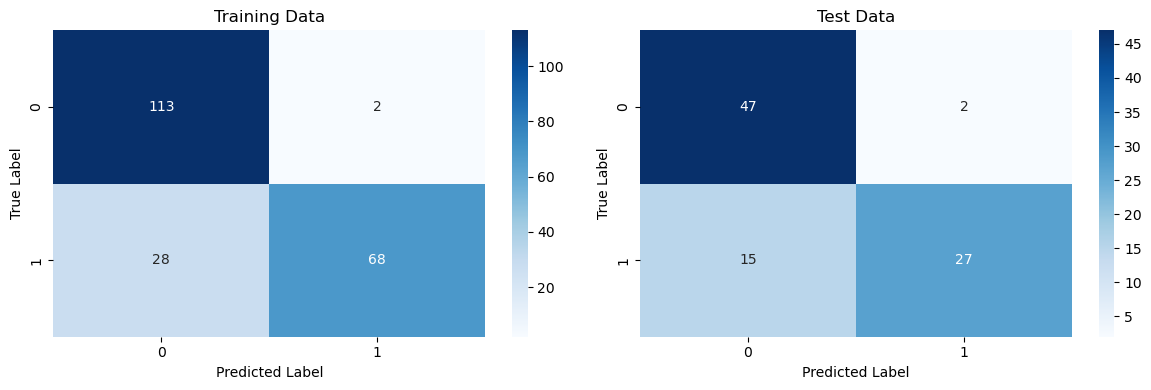

Transformed data


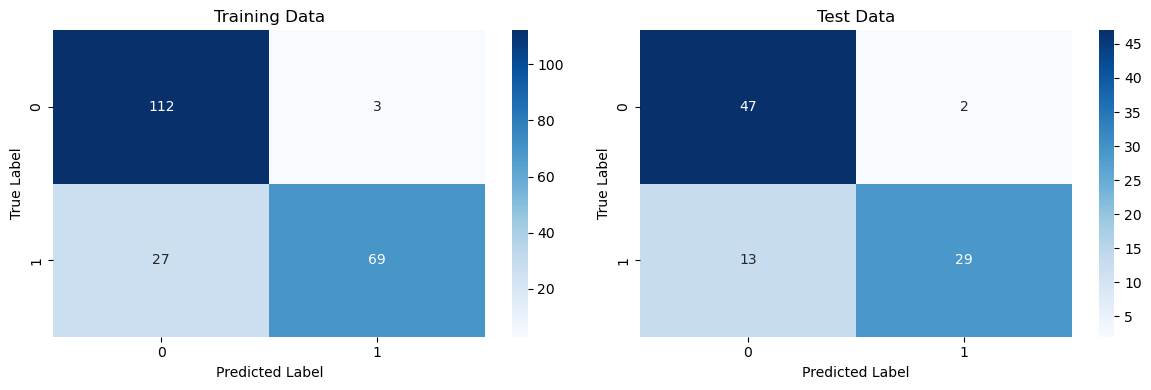

In [514]:
print("Original data")
plot_confusion_matrices([df2_y_train, df2_y_test], [train_predictions_df2, test_predictions_df2], ['Training Data', 'Test Data'])
print("Transformed data")
plot_confusion_matrices([transformed_y_train, transformed_y_test], [train_predictions_transformed, test_predictions_transformed], ['Training Data', 'Test Data'])


In [515]:
print("Original data")
print_classification_report(df2_y_train, train_predictions_df2, title='Training Data')
print_classification_report(df2_y_test, test_predictions_df2, title='Test Data')

print("Transformed data")
print_classification_report(transformed_y_train, train_predictions_transformed, title='Training Data')
print_classification_report(transformed_y_test, test_predictions_transformed, title='Test Data')

Original data
Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       115
           1       0.97      0.71      0.82        96

    accuracy                           0.86       211
   macro avg       0.89      0.85      0.85       211
weighted avg       0.88      0.86      0.85       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        49
           1       0.93      0.64      0.76        42

    accuracy                           0.81        91
   macro avg       0.84      0.80      0.80        91
weighted avg       0.84      0.81      0.81        91

Transformed data
Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       115
           1       0.96      0.72      0.82        96

    accuracy                          

Evaluating the SVM model using the **linear** kernal, C = **0.2**

Original data


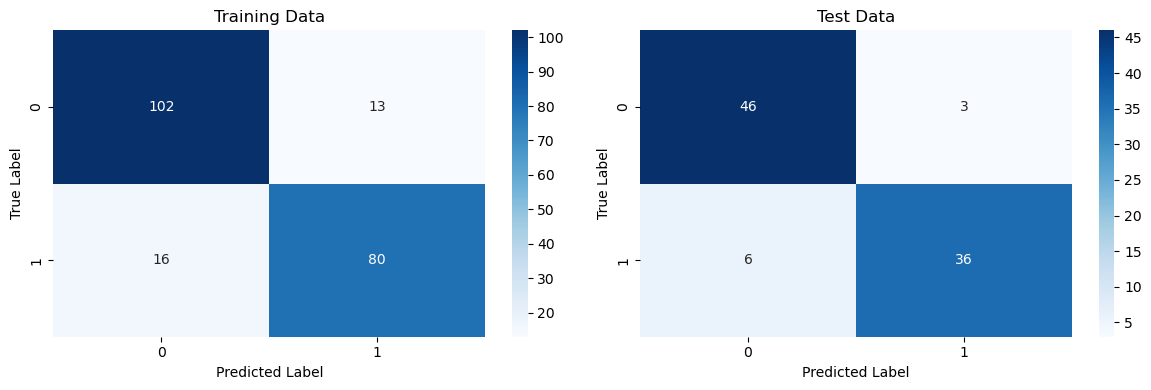

Transformed data


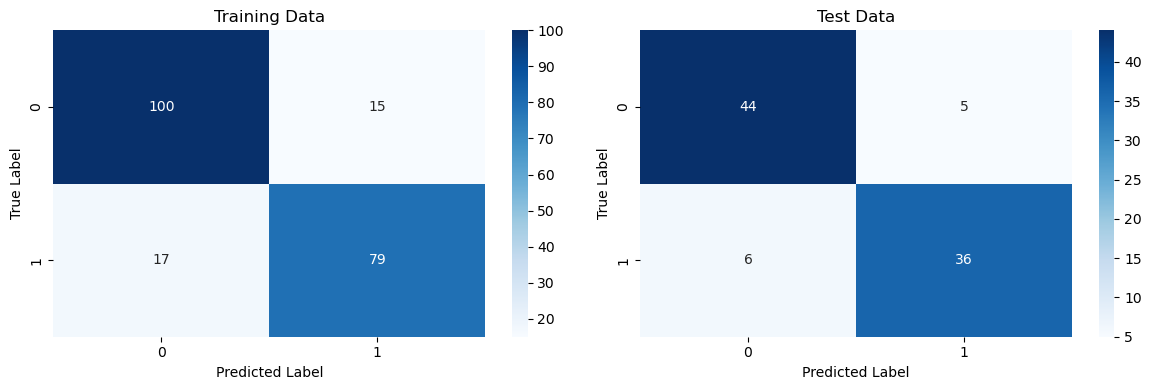

In [516]:
svm_model = create_svm_model(df2_X_train, df2_y_train, kernel='linear', C=0.2)
svm_model_transformed = create_svm_model(transformed_X_train, transformed_y_train, kernel='linear', C=0.2)

train_predictions_df2 = svm_model.predict(df2_X_train)
test_predictions_df2 = svm_model.predict(df2_X_test)

train_predictions_transformed = svm_model.predict(transformed_X_train)
test_predictions_transformed = svm_model.predict(transformed_X_test)

print("Original data")
plot_confusion_matrices([df2_y_train, df2_y_test], [train_predictions_df2, test_predictions_df2], ['Training Data', 'Test Data'])
print("Transformed data")
plot_confusion_matrices([transformed_y_train, transformed_y_test], [train_predictions_transformed, test_predictions_transformed], ['Training Data', 'Test Data'])


In [517]:
print("Original data")
print_classification_report(df2_y_train, train_predictions_df2, title='Training Data')
print_classification_report(df2_y_test, test_predictions_df2, title='Test Data')

print("Transformed data")
print_classification_report(transformed_y_train, train_predictions_transformed, title='Training Data')
print_classification_report(transformed_y_test, test_predictions_transformed, title='Test Data')

Original data
Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       115
           1       0.86      0.83      0.85        96

    accuracy                           0.86       211
   macro avg       0.86      0.86      0.86       211
weighted avg       0.86      0.86      0.86       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.92      0.86      0.89        42

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91

Transformed data
Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       115
           1       0.84      0.82      0.83        96

    accuracy                          

Evaluating the SVM model using the **rbf** kernal, C = **0.3**

Original data


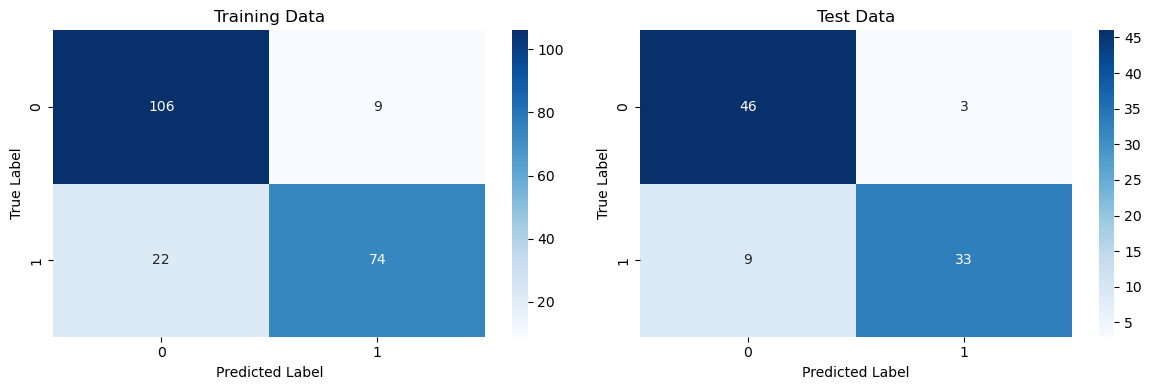

Transformed data


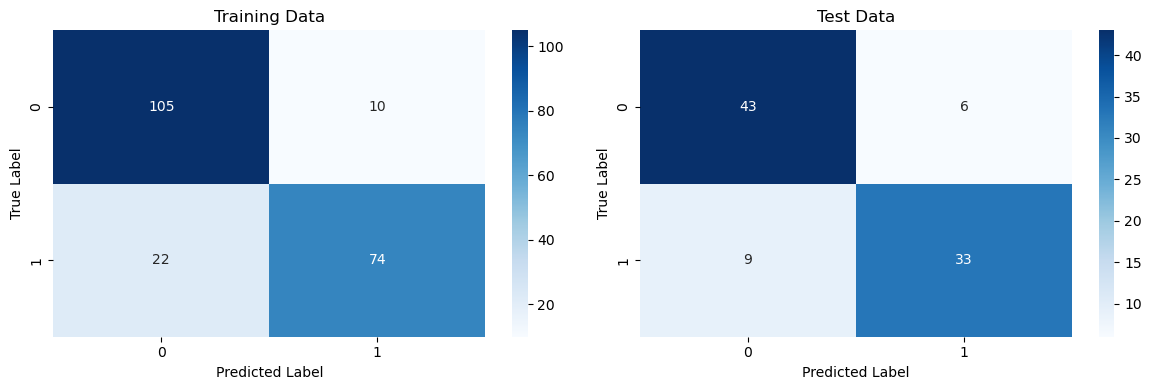

In [518]:
svm_model = create_svm_model(df2_X_train, df2_y_train, kernel='rbf', C=0.3)
svm_model_transformed = create_svm_model(transformed_X_train, transformed_y_train, kernel='rbf', C=0.3)

train_predictions_df2 = svm_model.predict(df2_X_train)
test_predictions_df2 = svm_model.predict(df2_X_test)

train_predictions_transformed = svm_model.predict(transformed_X_train)
test_predictions_transformed = svm_model.predict(transformed_X_test)

print("Original data")
plot_confusion_matrices([df2_y_train, df2_y_test], [train_predictions_df2, test_predictions_df2], ['Training Data', 'Test Data'])
print("Transformed data")
plot_confusion_matrices([transformed_y_train, transformed_y_test], [train_predictions_transformed, test_predictions_transformed], ['Training Data', 'Test Data'])


In [519]:
print("Original data")
print_classification_report(df2_y_train, train_predictions_df2, title='Training Data')
print_classification_report(df2_y_test, test_predictions_df2, title='Test Data')

print("Transformed data")
print_classification_report(transformed_y_train, train_predictions_transformed, title='Training Data')
print_classification_report(transformed_y_test, test_predictions_transformed, title='Test Data')

Original data
Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       115
           1       0.89      0.77      0.83        96

    accuracy                           0.85       211
   macro avg       0.86      0.85      0.85       211
weighted avg       0.86      0.85      0.85       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        49
           1       0.92      0.79      0.85        42

    accuracy                           0.87        91
   macro avg       0.88      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91

Transformed data
Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       115
           1       0.88      0.77      0.82        96

    accuracy                          

### Summary of SVM ###

1. SVM using **sigmoid** with **c = 0.3**   
Original train accuracy: 82%  
Original test accuracy: 90%  
Transformed train accuracy: 82%  
Transformed test accuracy: 87%  
2. SVM using **linear** with **c = 0.2**  
Original train accuracy: 86%  
Original test accuracy: 90%  
Transformed train accuracy: 85%  
Transformed test accuracy: 88%  
3. SVM using **poly** with **c= 0.4**  
Original train accuracy: 86%  
Original test accuracy: 81%  
Transformed train accuracy: 86%  
Transformed test accuracy: 84%  
4. SVM using **rbf** with **c = 0.3**
Original train accuracy: 85%  
Original test accuracy: 87%  
Transformed train accuracy: 85%  
Transformed test accuracy: 84%  

Decision Tree

ANN (Artificial Neural Networks)

Logical Regression

## Step 10 Conclusion